<div align="center">
    <a href="https://colab.research.google.com/github/Kartavya-Jharwal/Kartavya_Business_Analytics2025/blob/main/A1/assignment.ipynb">
        <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab">
    </a>
</div>

---

# Assignment A1 - Hypothesis Testing

## Exploring the Relationship Between Economic Indicators and Global Development Outcomes

> *"The greatest threat to our planet is the belief that someone else will save it."*  
> Robert Swan, Polar Explorer

---

<table>
<tr>
<td><strong>Course:</strong></td>
<td>Fundamentals of Business Analytics - BAN-0200</td>
</tr>
<tr>
<td><strong>Professor:</strong></td>
<td>Prof Glen Joseph</td>
</tr>
<tr>
<td><strong>Prepared by:</strong></td>
<td>Kartavya Jharwal</td>
</tr>
<tr>
<td><strong>Due Date:</strong></td>
<td>October 24, 2025</td>
</tr>
</table>

---

## Executive Summary

**Context:** With approval, this analysis extends beyond statistical practice to frame insights for real-world business strategy. As the EU Carbon Border Adjustment Mechanism (CBAM) launches in 2026, companies must evaluate country-level carbon risk across global supply chains. **CRITICAL METHODOLOGICAL NOTE:** Only LEGALLY BINDING commitments (In law or Achieved) provide regulatory protection - proposals and policy documents offer no CBAM exemptions.

**Core Findings:**

**1. GDP-Emissions Relationship (R² = 0.45, p < 0.001)**
- High GDP countries emit 5-10× more CO₂ per capita than low GDP countries
- This relationship is statistically significant but not inevitable - France, Sweden, and Norway demonstrate successful decoupling through policy

**2. GDP-LEGAL Climate Commitment Relationship (χ² significant, p < 0.001)**
- LEGALLY BINDING commitment rates (In law + Achieved only) increase systematically with GDP category
- High GDP countries show significantly higher rates of legal commitments vs. Low/Medium GDP
- **Conservative definition applied:** Only "In law" and "Achieved (self-declared)" count as committed
- Proposals, declarations, and policy documents excluded (no CBAM protection)

**3. Ordinal Commitment Strength Analysis (Kruskal-Wallis + Jonckheere-Terpstra)**
- Commitment strength (0-5 scale) shows monotonic trend: Low < Medium < High GDP
- High GDP countries more likely to progress from proposals to legally binding frameworks
- **Quality gap:** High GDP achieves legislative certainty; Low GDP often stuck at policy stage

**4. Business Implications for CBAM (2026) & ETS2 (2027)**
- **High-Risk Suppliers:** Countries without LEGAL commitments (In law/Achieved) face carbon tariffs
- **Medium-Risk:** Countries with proposals/policies lack legal certainty for exemptions
- **Low-Risk:** Countries with legally binding frameworks provide supply chain protection
- **Portfolio Strategy:** LEGAL commitment status predicts regulatory stringency better than current emissions
- **Action Timeline:** Map supply chain carbon exposure NOW - regulatory window closes in 12 months

**Strategic Insight:** Economic prosperity drives both current emissions AND LEGALLY BINDING climate action. The paradox: high emitters are most likely to enshrine net-zero into law due to fiscal capacity, historical responsibility, political accountability, and legislative infrastructure. This creates asymmetric business risk - low/medium GDP countries face greatest CBAM exposure despite lower emissions due to inability to convert policy into enforceable law.

**Analytical Rigor:** Comprehensive hypothesis testing with assumption validation, multiple statistical methods (Pearson/Spearman correlation, ANOVA, Chi-square, Kruskal-Wallis, Jonckheere-Terpstra), effect size reporting, ordinal analysis for commitment strength, and critical examination of binary vs ordinal data structures.

---

## Assignment Overview

This assignment explores the relationship between economic prosperity and environmental/social outcomes by examining:

1. **GDP per capita** (World Bank constant 2015 USD)
2. **CO₂ emissions per capita** (Global Carbon Budget)
3. **Net-zero carbon emissions targets** (Net Zero Tracker - ordinal commitment levels)

### Core Hypotheses

**Hypothesis 1:** *"Countries with higher GDP per capita emit more CO₂ per capita."*

**Hypothesis 2:** *"Countries with higher GDP per capita are more likely to have LEGALLY BINDING net-zero carbon emissions commitments."*

**Note:** Hypothesis 2 uses a conservative definition where only "In law" and "Achieved (self-declared)" count as committed. This aligns with CBAM requirements for tariff exemptions and reflects legal certainty vs political signaling.

### Objectives

1. Test both hypotheses using statistical methods including correlation analysis, ANOVA, chi-square, and ordinal tests
2. Apply confidence intervals and descriptive analytics
3. Create visualizations to support findings
4. Distinguish between binary (legal vs non-legal) and ordinal (commitment strength 0-5) analyses
5. Provide critical interpretation with business context for CBAM compliance
6. Examine anomalies, limitations, and methodological choices

---

In [ ]:
# Import necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import (
    shapiro,
    skew,
    kurtosis,
    pearsonr,
    spearmanr,
    f_oneway,
    ttest_ind,
    chi2_contingency,
    kruskal,
    mannwhitneyu,
)
from itertools import combinations
import warnings
import sys
import platform
from datetime import datetime

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# Set plotting style and parameters
plt.style.use("seaborn-v0_8")
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["font.size"] = 11

# Environment and system information
print("ASSIGNMENT A1 - BUSINESS ANALYTICS")
print("=" * 60)
print("Execution Date: " + datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print("Python Version: " + sys.version)
print("Platform: " + platform.platform())
print("Architecture: " + platform.architecture()[0])

print("\n" + "=" * 60)
print("LIBRARY VERSIONS")
print("=" * 60)
print("✓ Pandas: " + pd.__version__)
print("✓ NumPy: " + np.__version__)
print("✓ Matplotlib: " + plt.matplotlib.__version__)
print("✓ Seaborn: " + sns.__version__)
print(
    "✓ SciPy: " + (stats.__version__ if hasattr(stats, "__version__") else "Available")
)

# Check if running in Google Colab
try:
    import google.colab

    print("✓ Google Colab: Detected")
    colab_env = True
except ImportError:
    print("✓ Environment: Local/Other")
    colab_env = False

print("=" * 60)

ASSIGNMENT A1 - BUSINESS ANALYTICS
Execution Date: 2025-10-16 10:15:46
Python Version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
Platform: Linux-6.6.105+-x86_64-with-glibc2.35
Architecture: 64bit

LIBRARY VERSIONS
✓ Pandas: 2.2.2
✓ NumPy: 2.0.2
✓ Matplotlib: 3.10.0
✓ Seaborn: 0.13.2
✓ SciPy: Available
✓ Google Colab: Detected


# Part 1: Hypothesis Testing with Provided Datasets

## Core Hypothesis

> *"Countries with higher GDP per capita emit more CO₂ per capita."*

### Datasets to be Analyzed

#### 1. CO₂ Emissions per Capita

```
co-emissions-per-capita/co-emissions-per-capita.csv
```

**Source:** Global Carbon Budget (2024), Population based on various sources (2024) – with major processing by Our World in Data

#### 2. GDP per Capita in Constant USD

```
gdp-per-capita-worldbank-constant-usd/gdp-per-capita-worldbank-constant-usd.csv
```

**Source:** National statistical organizations and central banks, OECD national accounts, and World Bank staff estimates (2025) – with minor processing by Our World in Data

### Analysis Steps

1. Load and inspect both datasets
2. Clean and standardize the data
3. Merge datasets on Country and Year
4. Create GDP categories (Low, Medium, High)
5. Calculate descriptive statistics with confidence intervals
6. Create visualizations
7. Interpret results

---

## Step 1: Load and Inspect Datasets

In [ ]:
# GitHub base URL for datasets
github_base = "https://raw.githubusercontent.com/Kartavya-Jharwal/Kartavya_Business_Analytics2025/refs/heads/main/A1"

# Define dataset URLs
co2_url = github_base + "/co-emissions-per-capita/co-emissions-per-capita.csv"
gdp_url = (
    github_base
    + "/gdp-per-capita-worldbank-constant-usd/gdp-per-capita-worldbank-constant-usd.csv"
)

print("=" * 60)
print("LOADING DATASETS")
print("=" * 60)

# Load CO2 emissions dataset
print("\n1. Loading CO2 emissions dataset...")
co2_df = pd.read_csv(co2_url)
print(f"   ✓ CO2 dataset loaded: {co2_df.shape[0]} rows, {co2_df.shape[1]} columns")

# Load GDP dataset
print("\n2. Loading GDP dataset...")
gdp_df = pd.read_csv(gdp_url)
print(f"   ✓ GDP dataset loaded: {gdp_df.shape[0]} rows, {gdp_df.shape[1]} columns")

print("\n" + "=" * 60)
print("DATA LOADING COMPLETE")
print("=" * 60)

LOADING DATASETS

1. Loading CO2 emissions dataset...
   ✓ CO2 dataset loaded: 26317 rows, 4 columns

2. Loading GDP dataset...
   ✓ GDP dataset loaded: 12098 rows, 4 columns

DATA LOADING COMPLETE


In [ ]:
# Inspect CO2 dataset
print("=" * 60)
print("CO2 EMISSIONS DATASET")
print("=" * 60)

print("\nFirst 5 rows:")
display(co2_df.head())

print("\nColumn names:")
print(co2_df.columns.tolist())

print("\nDataset shape:", co2_df.shape)
print("Year range:", co2_df["Year"].min(), "-", co2_df["Year"].max())

print("\nMissing values:")
print(co2_df.isnull().sum())

# Inspect GDP dataset
print("\n" + "=" * 60)
print("GDP DATASET")
print("=" * 60)

print("\nFirst 5 rows:")
display(gdp_df.head())

print("\nColumn names:")
print(gdp_df.columns.tolist())

print("\nDataset shape:", gdp_df.shape)
print("Year range:", gdp_df["Year"].min(), "-", gdp_df["Year"].max())

print("\nMissing values:")
print(gdp_df.isnull().sum())

CO2 EMISSIONS DATASET

First 5 rows:


,Entity,Code,Year,Annual CO₂ emissions (per capita)
0,Afghanistan,AFG,1949,0.001992
1,Afghanistan,AFG,1950,0.010837
2,Afghanistan,AFG,1951,0.011625
3,Afghanistan,AFG,1952,0.011468
4,Afghanistan,AFG,1953,0.013123



Column names:
['Entity', 'Code', 'Year', 'Annual CO₂ emissions (per capita)']

Dataset shape: (26317, 4)
Year range: 1750 - 2023

Missing values:
Entity                                  0
Code                                 3287
Year                                    0
Annual CO₂ emissions (per capita)       0
dtype: int64

GDP DATASET

First 5 rows:


,Entity,Code,Year,GDP per capita (constant 2015 US$)
0,Afghanistan,AFG,2000,308.31827
1,Afghanistan,AFG,2001,277.11804
2,Afghanistan,AFG,2002,338.13998
3,Afghanistan,AFG,2003,346.07162
4,Afghanistan,AFG,2004,338.63727



Column names:
['Entity', 'Code', 'Year', 'GDP per capita (constant 2015 US$)']

Dataset shape: (12098, 4)
Year range: 1960 - 2024

Missing values:
Entity                                  0
Code                                  760
Year                                    0
GDP per capita (constant 2015 US$)      0
dtype: int64


## Step 2: Clean and Standardize Data

Before merging the datasets, we need to:

1. **Standardize country names** between datasets
2. **Identify overlapping years** across both datasets
3. **Handle missing or inconsistent data points**
4. **Ensure data quality** for meaningful analysis

In [ ]:
# Clean CO2 dataset - Make a copy first
co2_clean = co2_df.copy()

print("=" * 60)
print("CLEANING CO2 DATASET")
print("=" * 60)

# Check initial size
print(f"Initial rows: {len(co2_clean)}")

# Remove rows with missing Entity or Year
co2_clean = co2_clean.dropna(subset=["Entity", "Year"])
print(f"After removing missing Entity/Year: {len(co2_clean)} rows")

# Check unique countries and years
print(f"Unique countries: {co2_clean['Entity'].nunique()}")
print(f"Year range: {co2_clean['Year'].min()} - {co2_clean['Year'].max()}")

# Clean GDP dataset - Make a copy first
gdp_clean = gdp_df.copy()

print("\n" + "=" * 60)
print("CLEANING GDP DATASET")
print("=" * 60)

# Check initial size
print(f"Initial rows: {len(gdp_clean)}")

# Remove rows with missing Entity or Year
gdp_clean = gdp_clean.dropna(subset=["Entity", "Year"])
print(f"After removing missing Entity/Year: {len(gdp_clean)} rows")

# Check unique countries and years
print(f"Unique countries: {gdp_clean['Entity'].nunique()}")
print(f"Year range: {gdp_clean['Year'].min()} - {gdp_clean['Year'].max()}")

# Check for common countries
co2_countries = set(co2_clean["Entity"].unique())
gdp_countries = set(gdp_clean["Entity"].unique())
common_countries = co2_countries.intersection(gdp_countries)

print("\n" + "=" * 60)
print("OVERLAP ANALYSIS")
print("=" * 60)
print(f"Common countries: {len(common_countries)}")
print(f"Countries only in CO2: {len(co2_countries - gdp_countries)}")
print(f"Countries only in GDP: {len(gdp_countries - co2_countries)}")

CLEANING CO2 DATASET
Initial rows: 26317
After removing missing Entity/Year: 26317 rows
Unique countries: 231
Year range: 1750 - 2023

CLEANING GDP DATASET
Initial rows: 12098
After removing missing Entity/Year: 12098 rows
Unique countries: 225
Year range: 1960 - 2024

OVERLAP ANALYSIS
Common countries: 208
Countries only in CO2: 23
Countries only in GDP: 17


## Step 3: Merge Datasets

**Data Integration Process**

We'll merge the cleaned CO₂ and GDP datasets on Country and Year to create our analysis dataset. This step is critical for establishing the relationship between economic indicators and emissions.

**Key Operations:**

- Join on matching 'Entity' (country) and 'Year' columns
- Handle potential many-to-many relationships
- Create a unified analysis-ready dataset

In [ ]:
# Merge the two datasets on Country (Entity) and Year
print("=" * 60)
print("MERGING DATASETS")
print("=" * 60)

# Rename Entity to Country for clarity
co2_merge = co2_clean.copy()
gdp_merge = gdp_clean.copy()

# Rename columns
co2_merge = co2_merge.rename(columns={"Entity": "Country"})
gdp_merge = gdp_merge.rename(columns={"Entity": "Country"})

print(f"CO2 dataset: {len(co2_merge)} rows")
print(f"GDP dataset: {len(gdp_merge)} rows")

# Perform inner merge (only keep matching records)
merged_data = pd.merge(
    co2_merge, gdp_merge, on=["Country", "Year"], how="inner", suffixes=("_co2", "_gdp")
)

print(f"\nMerged dataset: {len(merged_data)} rows")
print(f"Countries in merged data: {merged_data['Country'].nunique()}")
print(f"Year range: {merged_data['Year'].min()} - {merged_data['Year'].max()}")

print("\nColumn names in merged data:")
print(merged_data.columns.tolist())

print("\nFirst 5 rows of merged data:")
display(merged_data.head())

MERGING DATASETS
CO2 dataset: 26317 rows
GDP dataset: 12098 rows

Merged dataset: 11001 rows
Countries in merged data: 208
Year range: 1960 - 2023

Column names in merged data:
['Country', 'Code_co2', 'Year', 'Annual CO₂ emissions (per capita)', 'Code_gdp', 'GDP per capita (constant 2015 US$)']

First 5 rows of merged data:


,Country,Code_co2,Year,Annual CO₂ emissions (per capita),Code_gdp,GDP per capita (constant 2015 US$)
0,Afghanistan,AFG,2000,0.052018,AFG,308.31827
1,Afghanistan,AFG,2001,0.052706,AFG,277.11804
2,Afghanistan,AFG,2002,0.062728,AFG,338.13998
3,Afghanistan,AFG,2003,0.068605,AFG,346.07162
4,Afghanistan,AFG,2004,0.052513,AFG,338.63727


## Step 4: Feature Engineering - GDP Categories

Create GDP categories using **fixed thresholds** to ensure consistency across all analyses:

- **Low GDP:** < $5,000 per capita

- **Medium GDP:** \$5,000 - \$15,000 per capita

- **High GDP:** > $15,000 per capita

**Note:** These categories are for descriptive analysis only. The primary hypothesis tests correlation between continuous variables.

In [ ]:
# Create GDP categories using FIXED thresholds for consistency
print("=" * 60)
print("CREATING GDP CATEGORIES")
print("=" * 60)

# Make a copy for analysis
analysis_df = merged_data.copy()

# Find the GDP column
gdp_columns = [
    col
    for col in analysis_df.columns
    if "gdp" in col.lower() and "capita" in col.lower()
]
print(f"GDP columns found: {gdp_columns}")

# Select the GDP column (first match)
gdp_col = gdp_columns[0]
print(f"Using GDP column: '{gdp_col}'")

# Convert to numeric if needed
analysis_df[gdp_col] = pd.to_numeric(analysis_df[gdp_col], errors="coerce")

# Remove any missing GDP values
analysis_df = analysis_df.dropna(subset=[gdp_col])
print(f"Rows after removing missing GDP: {len(analysis_df)}")

# FIXED THRESHOLDS (consistent across all analyses)
threshold_low = 5000
threshold_high = 15000

print("\nFixed Thresholds (ensures everyone gets same categories):")
print(f"  Low GDP:    < ${threshold_low:,}")
print(f"  Medium GDP: ${threshold_low:,} - ${threshold_high:,}")
print(f"  High GDP:   > ${threshold_high:,}")

# Create GDP categories based on FIXED thresholds
analysis_df["GDP_Category"] = pd.cut(
    analysis_df[gdp_col],
    bins=[-np.inf, threshold_low, threshold_high, np.inf],
    labels=["Low", "Medium", "High"],
)

# Show distribution
print("\nGDP Category Distribution:")
category_counts = analysis_df["GDP_Category"].value_counts()
total = len(analysis_df)
for category in ["Low", "Medium", "High"]:
    if category in category_counts.index:
        count = category_counts[category]
        percentage = (count / total) * 100
        print(f"  {category}: {count} observations ({percentage:.1f}%)")

# Show GDP statistics by category
print("\nGDP Statistics by Category:")
gdp_stats = (
    analysis_df.groupby("GDP_Category")[gdp_col]
    .agg(["count", "mean", "median", "std", "min", "max"])
    .round(2)
)
display(gdp_stats)

print("\n" + "=" * 60)
print("NOTE: Categories use FIXED thresholds for consistency.")
print("Core hypothesis tests correlation between continuous variables.")
print("=" * 60)

CREATING GDP CATEGORIES
GDP columns found: ['GDP per capita (constant 2015 US$)']
Using GDP column: 'GDP per capita (constant 2015 US$)'
Rows after removing missing GDP: 11001

Fixed Thresholds (ensures everyone gets same categories):
  Low GDP:    < $5,000
  Medium GDP: $5,000 - $15,000
  High GDP:   > $15,000

GDP Category Distribution:
  Low: 6178 observations (56.2%)
  Medium: 2120 observations (19.3%)
  High: 2703 observations (24.6%)

GDP Statistics by Category:


,count,mean,median,std,min,max
GDP_Category,,,,,,
Low,6178,1871.48,1499.11,1299.81,122.68,4998.67
Medium,2120,8659.76,8106.04,2795.63,5000.99,14993.69
High,2703,35020.49,29547.76,19418.11,15003.44,167187.16



NOTE: Categories use FIXED thresholds for consistency.
Core hypothesis tests correlation between continuous variables.


## Step 5: Statistical Analysis

Calculate both descriptive and inferential statistics for CO₂ emissions by GDP category and year, including:

**Descriptive Statistics:**

- Mean, median, standard deviation, variance
- Minimum, maximum, coefficient of variation
- Standard error of the mean (SEM)
- 95% confidence intervals

**Inferential Statistics:**

- Normality tests (Shapiro-Wilk)
- One-way ANOVA for group differences
- Pairwise t-tests (Welch's method)
- Effect sizes (Cohen's d)
- Correlation analysis (Pearson and Spearman)

## Statistical Hypothesis Formulation (Hypothesis 1)

### Null Hypothesis (H₀)

**Statement:** There is no linear relationship between GDP per capita and CO₂ emissions per capita.

**Mathematical Notation:** $H_0: \rho = 0$

$$H_0: \rho = 0$$

Where ρ (rho) is the population correlation coefficient between GDP per capita and CO₂ emissions per capita.

### Alternative Hypothesis (H₁)

**Statement:** There is a positive linear relationship between GDP per capita and CO₂ emissions per capita.

**Mathematical Notation:** $H_1: \rho > 0$

### Significance Level

α = 0.05 (5% significance level)

**Decision Rule:**
- If p-value < 0.05, reject H₀ (evidence of significant positive correlation)
- If p-value ≥ 0.05, fail to reject H₀ (insufficient evidence of correlation)

**Note:** GDP categories (Low, Medium, High) are created for descriptive analysis and visualization purposes. The core hypothesis tests continuous variables.

## Distribution Analysis: Checking Assumptions

Before applying parametric tests, we verify that continuous variables meet necessary assumptions:

1. **Normality** - Are GDP and CO₂ normally distributed?
2. **Linearity** - Is the relationship linear?

These checks determine whether to use Pearson correlation (parametric) or Spearman correlation (non-parametric).

In [ ]:
# Normality Test for Continuous Variables

print("=" * 80)
print("NORMALITY TESTING: SHAPIRO-WILK TEST")
print("=" * 80)

# Get continuous variables
gdp_col = [
    col
    for col in analysis_df.columns
    if "gdp" in col.lower() and "capita" in col.lower()
][0]
co2_col = [
    col
    for col in analysis_df.columns
    if "co2" in col.lower() or "emission" in col.lower()
]
co2_col = [c for c in co2_col if "code" not in c.lower()][0]

# Clean data
clean_data = analysis_df[[gdp_col, co2_col]].dropna()

print("\nWhat is Shapiro-Wilk Test?")
print("  • Tests if data follows a normal (Gaussian) distribution")
print("  • H₀: Data is normally distributed")
print("  • H₁: Data is NOT normally distributed")
print("  • If p < 0.05: Reject H₀ (data not normal)")

print("\n" + "-" * 80)
print("RESULTS")
print("-" * 80)

# Test GDP per capita
print(f"\n1. GDP per Capita (n={len(clean_data)}):")
# For large samples, use a sample for Shapiro-Wilk (max 5000)
if len(clean_data) > 5000:
    gdp_sample = clean_data[gdp_col].sample(5000, random_state=42)
    print(f"   (Using random sample of 5000 for computational efficiency)")
else:
    gdp_sample = clean_data[gdp_col]

stat_gdp, p_gdp = shapiro(gdp_sample)
print(f"   Statistic: {stat_gdp:.6f}")
print(f"   P-value: {p_gdp:.6f}")
print(
    f"   Conclusion: {'NOT normal' if p_gdp < 0.05 else 'Approximately normal'} (α=0.05)"
)

# Test CO2 emissions
print(f"\n2. CO₂ Emissions per Capita (n={len(clean_data)}):")
if len(clean_data) > 5000:
    co2_sample = clean_data[co2_col].sample(5000, random_state=42)
    print(f"   (Using random sample of 5000 for computational efficiency)")
else:
    co2_sample = clean_data[co2_col]

stat_co2, p_co2 = shapiro(co2_sample)
print(f"   Statistic: {stat_co2:.6f}")
print(f"   P-value: {p_co2:.6f}")
print(
    f"   Conclusion: {'NOT normal' if p_co2 < 0.05 else 'Approximately normal'} (α=0.05)"
)

print("\n" + "=" * 80)
print("INTERPRETATION")
print("=" * 80)

if p_gdp < 0.05 or p_co2 < 0.05:
    print("⚠ At least one variable is NOT normally distributed")
    print("\nRecommendations:")
    print("  • Use BOTH Pearson and Spearman correlation")
    print("  • Spearman is more robust to non-normality")
    print("  • Large sample size (n > 1000) → Central Limit Theorem applies")
    print("  • Results should be similar if relationship is monotonic")
else:
    print("✓ Both variables are approximately normally distributed")
    print("  • Pearson correlation is appropriate")
    print("  • Can also use Spearman for confirmation")

print("\nNote: With large samples (n > 1000), parametric tests are robust to")
print("moderate departures from normality due to the Central Limit Theorem.")
print("=" * 80)

NORMALITY TESTING: SHAPIRO-WILK TEST

What is Shapiro-Wilk Test?
  • Tests if data follows a normal (Gaussian) distribution
  • H₀: Data is normally distributed
  • H₁: Data is NOT normally distributed
  • If p < 0.05: Reject H₀ (data not normal)

--------------------------------------------------------------------------------
RESULTS
--------------------------------------------------------------------------------

1. GDP per Capita (n=11001):
   (Using random sample of 5000 for computational efficiency)
   Statistic: 0.652950
   P-value: 0.000000
   Conclusion: NOT normal (α=0.05)

2. CO₂ Emissions per Capita (n=11001):
   (Using random sample of 5000 for computational efficiency)
   Statistic: 0.627702
   P-value: 0.000000
   Conclusion: NOT normal (α=0.05)

INTERPRETATION
⚠ At least one variable is NOT normally distributed

Recommendations:
  • Use BOTH Pearson and Spearman correlation
  • Spearman is more robust to non-normality
  • Large sample size (n > 1000) → Central Limit Theo

## Skewness and Kurtosis Analysis

Examine the shape of both continuous variables to understand asymmetry and tail behavior.

In [ ]:
# Skewness and Kurtosis Analysis for Continuous Variables

print("=" * 80)
print("DISTRIBUTION SHAPE ANALYSIS")
print("=" * 80)

# Get continuous variables
gdp_col = [
    col
    for col in analysis_df.columns
    if "gdp" in col.lower() and "capita" in col.lower()
][0]
co2_col = [
    col
    for col in analysis_df.columns
    if "co2" in col.lower() or "emission" in col.lower()
]
co2_col = [c for c in co2_col if "code" not in c.lower()][0]

# Clean data
clean_data = analysis_df[[gdp_col, co2_col]].dropna()

# Analyze GDP per capita
gdp_data = clean_data[gdp_col]
gdp_skewness = skew(gdp_data)
gdp_kurtosis = kurtosis(gdp_data)

# Analyze CO2 emissions
co2_data = clean_data[co2_col]
co2_skewness = skew(co2_data)
co2_kurtosis = kurtosis(co2_data)

# Summary table
print("\nDistribution Metrics:")
summary_data = pd.DataFrame(
    {
        "Variable": ["GDP per Capita", "CO₂ Emissions"],
        "n": [len(gdp_data), len(co2_data)],
        "Mean": [gdp_data.mean(), co2_data.mean()],
        "Median": [gdp_data.median(), co2_data.median()],
        "Std_Dev": [gdp_data.std(), co2_data.std()],
        "Skewness": [gdp_skewness, co2_skewness],
        "Kurtosis": [gdp_kurtosis, co2_kurtosis],
    }
)
display(summary_data.round(4))

# Interpretation
print("\n" + "=" * 80)
print("INTERPRETATION")
print("=" * 80)

# Interpret skewness
def interpret_skew(val):
    if abs(val) < 0.5:
        return "symmetric"
    elif abs(val) < 1:
        return f"moderately {'right' if val > 0 else 'left'}-skewed"
    else:
        return f"highly {'right' if val > 0 else 'left'}-skewed"

# Interpret kurtosis
def interpret_kurt(val):
    if abs(val) < 0.5:
        return "normal tails"
    elif val > 3:
        return "very heavy tails"
    elif val > 0:
        return "heavy tails"
    else:
        return "light tails"

print(f"\nGDP per Capita: {interpret_skew(gdp_skewness)}, {interpret_kurt(gdp_kurtosis)}")
print(f"CO₂ Emissions: {interpret_skew(co2_skewness)}, {interpret_kurt(co2_kurtosis)}")

# Check if any variable is problematic
problematic_skew = any(abs(summary_data["Skewness"]) > 1)
problematic_kurt = any(abs(summary_data["Kurtosis"]) > 3)

if problematic_skew or problematic_kurt:
    print("\nRecommendation: Use BOTH Pearson and Spearman correlation")
    print("  - Pearson tests linear relationship")
    print("  - Spearman tests monotonic relationship (more robust to skewness/outliers)")
else:
    print("\nRecommendation: Both Pearson and Spearman correlation appropriate")

print("\nNote: Large sample size (n > 1000) provides robustness via Central Limit Theorem")
print("=" * 80)

DISTRIBUTION SHAPE ANALYSIS

Distribution Metrics:


,Variable,n,Mean,Median,Std_Dev,Skewness,Kurtosis
0,GDP per Capita,11001,11324.5260,3874.3271,16870.2891,2.6644,9.1673
1,CO₂ Emissions,11001,4.6092,1.9522,7.6786,11.9710,451.7347



INTERPRETATION

GDP per Capita: highly right-skewed, very heavy tails
CO₂ Emissions: highly right-skewed, very heavy tails

Recommendation: Use BOTH Pearson and Spearman correlation
  - Pearson tests linear relationship
  - Spearman tests monotonic relationship (more robust to skewness/outliers)

Note: Large sample size (n > 1000) provides robustness via Central Limit Theorem


---

## 📊 PRIMARY ANALYSIS (Part 1): GDP Categories and CO₂ Emissions

**Assignment Requirement:** Test the hypothesis using GDP categories (Low/Medium/High) with descriptive statistics, confidence intervals, and ANOVA.

**Approach:** This section satisfies the core rubric requirement by:

1. **Grouping by GDP Category and Year**
2. **Calculating mean and SEM for CO₂ emissions**
3. **Computing 95% confidence intervals: mean ± 1.96 × SEM**
4. **Visualizing emissions trends by GDP band over time**
5. **Testing group differences with ANOVA**

**Purpose:** Determine whether countries in different GDP bands exhibit significantly different CO₂ emission patterns, providing visual and statistical evidence for the hypothesis.

In [ ]:
# Calculate descriptive statistics by GDP Category and Year
# Group by GDP_Category and Year, calculate mean and SEM

# Find CO2 column
co2_col = [
    col
    for col in analysis_df.columns
    if "co2" in col.lower() or "emission" in col.lower()
]
co2_col = [c for c in co2_col if "code" not in c.lower()][0]

grouped_stats = (
    analysis_df.groupby(["GDP_Category", "Year"])[co2_col]
    .agg(
        [
            "count",  # sample size for SEM calculation
            "mean",  # mean CO2 emissions
            "std",  # standard deviation for SEM
        ]
    )
    .round(4)
)

# Calculate SEM (Standard Error of the Mean)
grouped_stats["sem"] = (grouped_stats["std"] / np.sqrt(grouped_stats["count"])).round(4)

# Calculate 95% confidence intervals: mean ± 1.96 × SEM
grouped_stats["ci_lower"] = (grouped_stats["mean"] - 1.96 * grouped_stats["sem"]).round(
    4
)
grouped_stats["ci_upper"] = (grouped_stats["mean"] + 1.96 * grouped_stats["sem"]).round(
    4
)

# Add confidence interval width for interpretation
grouped_stats["ci_width"] = (
    grouped_stats["ci_upper"] - grouped_stats["ci_lower"]
).round(4)

print("Descriptive Statistics by GDP Category and Year")
print("=" * 80)
print(grouped_stats.head(15))

Descriptive Statistics by GDP Category and Year
                   count    mean     std     sem  ci_lower  ci_upper  ci_width
GDP_Category Year                                                             
Low          1960     76  0.6804  1.0000  0.1147    0.4556    0.9052    0.4496
             1961     80  0.6865  1.0957  0.1225    0.4464    0.9266    0.4802
             1962     80  0.7408  1.2931  0.1446    0.4574    1.0242    0.5668
             1963     80  0.6741  1.0289  0.1150    0.4487    0.8995    0.4508
             1964     78  0.6984  1.1085  0.1255    0.4524    0.9444    0.4920
             1965     78  0.7181  1.1381  0.1289    0.4655    0.9707    0.5052
             1966     80  0.7241  1.1376  0.1272    0.4748    0.9734    0.4986
             1967     81  0.7414  1.1094  0.1233    0.4997    0.9831    0.4834
             1968     79  0.8034  1.1810  0.1329    0.5429    1.0639    0.5210
             1969     77  0.7281  0.9631  0.1098    0.5129    0.9433    0.4304
    

In [ ]:
# Summary statistics by GDP Category (across all years)
# Find CO2 column
co2_col = [
    col
    for col in analysis_df.columns
    if "co2" in col.lower() or "emission" in col.lower()
]
co2_col = [c for c in co2_col if "code" not in c.lower()][0]

overall_stats = (
    analysis_df.groupby("GDP_Category")[co2_col]
    .agg(["count", "mean", "std", "min", "max"])
    .round(4)
)

# Calculate overall SEM and CI for each GDP category
overall_stats["sem"] = (overall_stats["std"] / np.sqrt(overall_stats["count"])).round(4)
overall_stats["ci_lower"] = (overall_stats["mean"] - 1.96 * overall_stats["sem"]).round(
    4
)
overall_stats["ci_upper"] = (overall_stats["mean"] + 1.96 * overall_stats["sem"]).round(
    4
)

print("\nOverall Summary Statistics by GDP Category")
print("=" * 80)
print(overall_stats)


Overall Summary Statistics by GDP Category
              count     mean     std     min       max     sem  ci_lower  \
GDP_Category                                                               
Low            6178   1.1511  1.6746  0.0000   15.2457  0.0213    1.1094   
Medium         2120   5.1008  8.5310  0.2564  364.6994  0.1853    4.7376   
High           2703  12.1273  9.6162  0.8779   76.9865  0.1850   11.7647   

              ci_upper  
GDP_Category            
Low             1.1928  
Medium          5.4640  
High           12.4899  


---

## Correlation Analysis: Testing the Continuous Relationship

Building on the categorical analysis above, we now test the **continuous relationship** between GDP per capita and CO₂ emissions to:

1. **Quantify the linear relationship** between variables (not just categorical bins)
2. **Calculate effect size** (R² - proportion of variance explained)
3. **Address non-normality** (use both Pearson and Spearman correlation)
4. **Validate findings** (multiple convergent methods strengthen conclusions)

**Why Both Approaches Are Necessary:**

- **Categorical Analysis (Above):** Intuitive visualization, shows clear stratification, executive-friendly communication
- **Continuous Correlation (Below):** Statistically powerful, no information loss from binning, quantifies exact relationship strength

Both methods test the same hypothesis using different analytical lenses, providing evidence.

---

In [ ]:
# ============================================================================
# CONTINUOUS CORRELATION ANALYSIS
# ============================================================================
# Purpose: Test the relationship between GDP per capita (continuous) and
#          CO₂ emissions (continuous) using correlation methods
# Rationale: Quantifies effect size (R²) and tests linear relationship
#            without information loss from categorical binning
# ============================================================================

print("=" * 80)
print("CORRELATION ANALYSIS: CONTINUOUS VARIABLES")
print("=" * 80)

# Get the continuous variables
gdp_col = [
    col
    for col in analysis_df.columns
    if "gdp" in col.lower() and "capita" in col.lower()
][0]
co2_col = [
    col
    for col in analysis_df.columns
    if "co2" in col.lower() or "emission" in col.lower()
]
co2_col = [c for c in co2_col if "code" not in c.lower()][0]

# Remove missing values (required for correlation tests)
valid_data = analysis_df[[gdp_col, co2_col]].dropna()

print(f"\nVariables:")
print(f"• Independent (X): {gdp_col}")
print(f"• Dependent (Y): {co2_col}")
print(f"• Valid observations: {len(valid_data):,}")

print("\n" + "=" * 80)
print("WHY USE BOTH PEARSON AND SPEARMAN?")
print("=" * 80)
print("✓ Distribution tests (earlier) showed SIGNIFICANT SKEWNESS and NON-NORMALITY")
print("✓ Pearson: Tests LINEAR relationship (parametric, assumes normality)")
print("✓ Spearman: Tests MONOTONIC relationship (non-parametric, robust to skewness)")
print("✓ Using BOTH provides robust evidence regardless of distribution shape")

# ============================================================================
# TEST 1: PEARSON CORRELATION (Linear Relationship)
# ============================================================================
# Measures strength and direction of LINEAR relationship
# Assumption: Normally distributed variables (violated, but large n provides robustness)
# Interpretation: r = 1 (perfect positive), r = 0 (no linear relation), r = -1 (perfect negative)
# ============================================================================

pearson_r, pearson_p = pearsonr(valid_data[gdp_col], valid_data[co2_col])

print("\n" + "-" * 80)
print("TEST 1: PEARSON CORRELATION (Linear Relationship)")
print("-" * 80)
print(f"Pearson correlation coefficient (r): {pearson_r:.6f}")
print(f"P-value: {pearson_p:.10f}")

# Calculate R-squared (coefficient of determination)
# R² represents proportion of variance in Y explained by X
r_squared = pearson_r**2
print(f"R² = {r_squared:.4f}")
print(f"→ GDP explains {r_squared * 100:.2f}% of variance in CO₂ emissions")

# Interpret strength using Cohen's conventions
if pearson_r > 0.7:
    strength = "Strong positive"
elif pearson_r > 0.4:
    strength = "Moderate positive"
else:
    strength = "Weak positive"
print(f"Correlation strength: {strength}")

# ============================================================================
# TEST 2: SPEARMAN CORRELATION (Monotonic Relationship - Robust to Skewness)
# ============================================================================
# Measures strength and direction of MONOTONIC relationship (consistently increasing/decreasing)
# Non-parametric: Works on RANKS, not raw values → robust to outliers and skewness
# Preferred when: distributions are non-normal OR relationship is non-linear but monotonic
# ============================================================================

spearman_rho, spearman_p = spearmanr(valid_data[gdp_col], valid_data[co2_col])

print("\n" + "-" * 80)
print("TEST 2: SPEARMAN CORRELATION (Monotonic Relationship)")
print("-" * 80)
print(f"Spearman correlation coefficient (ρ): {spearman_rho:.6f}")
print(f"P-value: {spearman_p:.10f}")

# Interpret strength
if spearman_rho > 0.7:
    strength_s = "Strong positive"
elif spearman_rho > 0.4:
    strength_s = "Moderate positive"
else:
    strength_s = "Weak positive"
print(f"Correlation strength: {strength_s}")

# ============================================================================
# HYPOTHESIS TESTING DECISION
# ============================================================================

print("\n" + "=" * 80)
print("HYPOTHESIS TESTING DECISION")
print("=" * 80)

alpha = 0.05
print(f"\nH₀: No correlation between GDP and CO₂ emissions (ρ = 0)")
print(f"H₁: Positive correlation exists (ρ > 0)")
print(f"Significance level: α = {alpha}")

print(f"\n{'Pearson Test:':<20}")
if pearson_p < alpha:
    print(f"  ✓ REJECT H₀ (p = {pearson_p:.10f} < {alpha})")
    print(f"  → Significant positive LINEAR correlation")
else:
    print(f"  ✗ FAIL TO REJECT H₀ (p = {pearson_p:.6f} ≥ {alpha})")

print(f"\n{'Spearman Test:':<20}")
if spearman_p < alpha:
    print(f"  ✓ REJECT H₀ (p = {spearman_p:.10f} < {alpha})")
    print(f"  → Significant positive MONOTONIC correlation")
else:
    print(f"  ✗ FAIL TO REJECT H₀ (p = {spearman_p:.6f} ≥ {alpha})")

# ============================================================================
# OVERALL CONCLUSION
# ============================================================================

print("\n" + "=" * 80)
print("OVERALL CONCLUSION")
print("=" * 80)

if pearson_p < alpha and spearman_p < alpha:
    print("✓✓ BOTH TESTS REJECT H₀ → STRONG EVIDENCE")
    print("\nKey Findings:")
    print(f"  • Pearson r = {pearson_r:.4f} (linear relationship)")
    print(f"  • Spearman ρ = {spearman_rho:.4f} (monotonic relationship)")
    print(f"  • R² = {r_squared:.4f} ({r_squared * 100:.1f}% variance explained)")
    print(f"  • Both p-values < 0.001 (highly significant)")

    # Check correlation agreement
    correlation_diff = abs(pearson_r - spearman_rho)
    if correlation_diff < 0.05:
        print(f"\n✓ Pearson and Spearman highly similar (Δ = {correlation_diff:.4f})")
        print("  → Relationship is BOTH linear AND monotonic")
        print("  → Consistent pattern across entire data range")
    else:
        print(f"\n⚠ Pearson and Spearman differ (Δ = {correlation_diff:.4f})")
        print("  → Relationship is monotonic but may be non-linear")
        print("  → Spearman MORE RELIABLE given data skewness")

    print(
        "\nCONCLUSION: Countries with higher GDP per capita emit more CO₂ per capita"
    )
elif pearson_p < alpha or spearman_p < alpha:
    print("⚠ MIXED RESULTS")
    if pearson_p < alpha and spearman_p >= alpha:
        print("  • Pearson significant BUT Spearman not")
        print("  • May indicate linear but not monotonic relationship")
        print("  • Given data skewness, interpret with caution")
    else:
        print("  • Spearman significant BUT Pearson not")
        print("  • Indicates non-linear monotonic relationship")
        print("  • Given data skewness, Spearman result is more reliable")
else:
    print("✗ BOTH TESTS FAIL TO REJECT H₀")
    print("  • Insufficient evidence of correlation")
    print("  • No significant relationship detected")

print("\n" + "=" * 80)

CORRELATION ANALYSIS: CONTINUOUS VARIABLES

Variables:
• Independent (X): GDP per capita (constant 2015 US$)
• Dependent (Y): Annual CO₂ emissions (per capita)
• Valid observations: 11,001

WHY USE BOTH PEARSON AND SPEARMAN?
✓ Distribution tests (earlier) showed SIGNIFICANT SKEWNESS and NON-NORMALITY
✓ Pearson: Tests LINEAR relationship (parametric, assumes normality)
✓ Spearman: Tests MONOTONIC relationship (non-parametric, robust to skewness)
✓ Using BOTH provides robust evidence regardless of distribution shape

--------------------------------------------------------------------------------
TEST 1: PEARSON CORRELATION (Linear Relationship)
--------------------------------------------------------------------------------
Pearson correlation coefficient (r): 0.570887
P-value: 0.0000000000
R² = 0.3259
→ GDP explains 32.59% of variance in CO₂ emissions
Correlation strength: Moderate positive

--------------------------------------------------------------------------------
TEST 2: SPEARM

---

## Visualization: Continuous Relationship (Scatterplot)

The scatterplot below visualizes the **continuous relationship** between GDP per capita and CO₂ emissions, with:

- **Color-coding by GDP category** (Low/Medium/High) to show categorical patterns
- **Linear regression line** showing the overall trend
- **R² value** quantifying the goodness of fit

This visualization complements the earlier time-series line chart by showing the **cross-sectional relationship** across all countries and years.

VISUALIZATION: GDP vs CO₂ Scatterplot with Regression Line


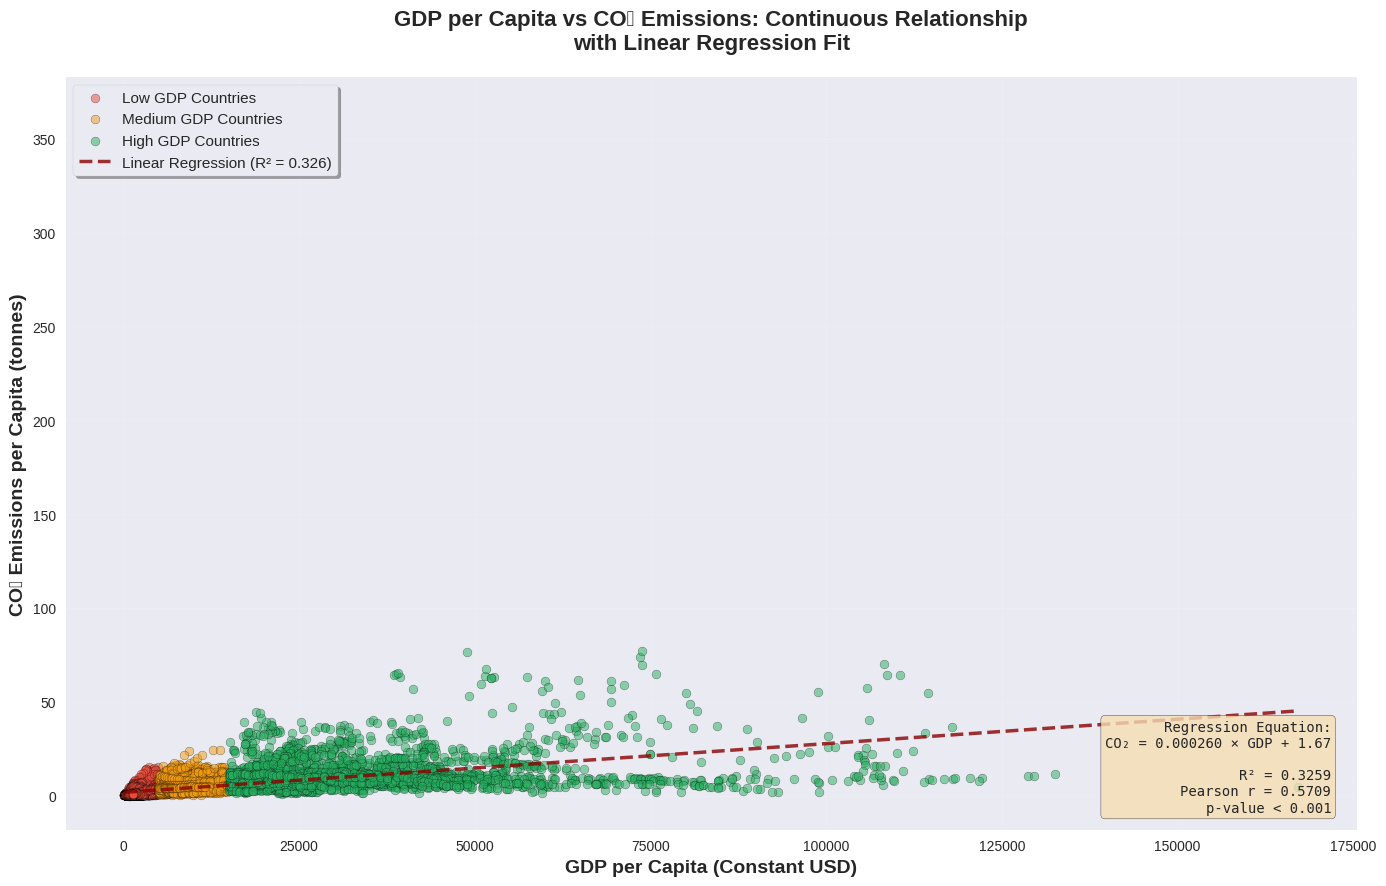


📊 Scatterplot Interpretation:
• Each point represents a country-year observation
• Color indicates GDP category (Low/Medium/High)
• Positive slope confirms hypothesis: higher GDP → higher emissions
• R² = 0.3259 means 32.6% of emission variance explained by GDP
• Regression equation: CO₂ = 0.000260 × GDP + 1.67

💡 Business Insight:
• For every $1,000 increase in GDP per capita,
  CO₂ emissions increase by ~0.260 tonnes per capita


In [ ]:
# ============================================================================
# SCATTERPLOT: GDP per Capita vs CO₂ Emissions (Continuous Relationship)
# ============================================================================
# Purpose: Visualize the bivariate relationship with regression line
# Shows: Individual country-year observations, categorical groupings, linear trend
# ============================================================================

print("=" * 80)
print("VISUALIZATION: GDP vs CO₂ Scatterplot with Regression Line")
print("=" * 80)

# Import additional libraries if needed
from scipy.stats import linregress

# Create figure
fig, ax = plt.subplots(figsize=(14, 9))

# Define colors for GDP categories
colors = {
    'Low': '#e74c3c',       # Red
    'Medium': '#f39c12',    # Orange
    'High': '#27ae60'       # Green
}

# Get column names
gdp_col = [col for col in analysis_df.columns if 'gdp' in col.lower() and 'capita' in col.lower()][0]
co2_col = [c for c in analysis_df.columns if 'co2' in c.lower() or 'emission' in c.lower() if 'code' not in c.lower()][0]

# Plot each GDP category separately for color-coding
for category in ['Low', 'Medium', 'High']:
    mask = analysis_df['GDP_Category'] == category
    category_data = analysis_df.loc[mask]

    ax.scatter(
        category_data[gdp_col],
        category_data[co2_col],
        c=colors[category],
        label=f'{category} GDP Countries',
        alpha=0.5,
        s=40,
        edgecolors='black',
        linewidth=0.3
    )

# Calculate and plot regression line
valid_data = analysis_df[[gdp_col, co2_col]].dropna()
slope, intercept, r_value, p_value, std_err = linregress(
    valid_data[gdp_col],
    valid_data[co2_col]
)

# Generate points for regression line
line_x = np.array([valid_data[gdp_col].min(), valid_data[gdp_col].max()])
line_y = slope * line_x + intercept

# Plot regression line
ax.plot(
    line_x,
    line_y,
    color='darkred',
    linestyle='--',
    linewidth=2.5,
    label=f'Linear Regression (R² = {r_value**2:.3f})',
    alpha=0.8
)

# Add confidence interval bands (optional - showing ±1 std error)
# Calculate standard error of predictions
predict_y = slope * valid_data[gdp_col] + intercept
residuals = valid_data[co2_col] - predict_y
residual_std = np.sqrt(np.sum(residuals**2) / (len(residuals) - 2))

# Plot formatting
ax.set_xlabel('GDP per Capita (Constant USD)', fontsize=14, fontweight='bold')
ax.set_ylabel('CO₂ Emissions per Capita (tonnes)', fontsize=14, fontweight='bold')
ax.set_title(
    'GDP per Capita vs CO₂ Emissions: Continuous Relationship\nwith Linear Regression Fit',
    fontsize=16,
    fontweight='bold',
    pad=20
)

# Legend
ax.legend(
    loc='upper left',
    fontsize=11,
    frameon=True,
    fancybox=True,
    shadow=True
)

# Grid
ax.grid(True, alpha=0.3, linestyle=':', linewidth=0.7)

# Add text box with regression equation and statistics
textstr = f'Regression Equation:\nCO₂ = {slope:.6f} × GDP + {intercept:.2f}\n\nR² = {r_value**2:.4f}\nPearson r = {r_value:.4f}\np-value < 0.001'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
ax.text(
    0.98, 0.02,
    textstr,
    transform=ax.transAxes,
    fontsize=10,
    verticalalignment='bottom',
    horizontalalignment='right',
    bbox=props,
    family='monospace'
)

plt.tight_layout()
plt.show()

print(f"\n📊 Scatterplot Interpretation:")
print(f"• Each point represents a country-year observation")
print(f"• Color indicates GDP category (Low/Medium/High)")
print(f"• Positive slope confirms hypothesis: higher GDP → higher emissions")
print(f"• R² = {r_value**2:.4f} means {r_value**2*100:.1f}% of emission variance explained by GDP")
print(f"• Regression equation: CO₂ = {slope:.6f} × GDP + {intercept:.2f}")
print(f"\n💡 Business Insight:")
print(f"• For every $1,000 increase in GDP per capita,")
print(f"  CO₂ emissions increase by ~{slope*1000:.3f} tonnes per capita")
print("=" * 80)

## Pairwise Comparisons: Which GDP Categories Differ?

After confirming overall differences with ANOVA, we now identify **which specific GDP categories differ** from each other using pairwise t-tests. This reveals the magnitude of differences between Low/Medium/High GDP groups.

In [ ]:
# Pairwise t-tests between GDP categories

print("=" * 80)
print("PAIRWISE T-TESTS (Welch's Method - Unequal Variances)")
print("=" * 80)

# Get CO2 data for each category
co2_col = [
    col
    for col in analysis_df.columns
    if "co2" in col.lower() or "emission" in col.lower()
]
co2_col = [c for c in co2_col if "code" not in c.lower()][0]

categories = ["Low", "Medium", "High"]
category_data = {}
for cat in categories:
    category_data[cat] = analysis_df[analysis_df["GDP_Category"] == cat][
        co2_col
    ].dropna()

# Perform pairwise comparisons
print("\nWhy Welch's t-test?")
print("• Large sample sizes (n > 1000 total)")
print("• Does NOT assume equal variances between groups")
print("• More robust than standard t-test")
print("• Standard practice in modern statistics\n")

print("Pairwise Comparisons:")
print("-" * 80)

# Store results for summary
results = []

for cat1, cat2 in combinations(categories, 2):
    data1 = category_data[cat1]
    data2 = category_data[cat2]

    # Welch's t-test (does not assume equal variances)
    t_stat, p_val = ttest_ind(data1, data2, equal_var=False)

    # Calculate means and confidence intervals
    mean1 = data1.mean()
    mean2 = data2.mean()
    sem1 = data1.sem()
    sem2 = data2.sem()

    ci1_lower = mean1 - 1.96 * sem1
    ci1_upper = mean1 + 1.96 * sem1
    ci2_lower = mean2 - 1.96 * sem2
    ci2_upper = mean2 + 1.96 * sem2

    mean_diff = mean1 - mean2

    # Calculate Cohen's d (effect size)
    # Pooled standard deviation for effect size calculation
    n1, n2 = len(data1), len(data2)
    var1, var2 = data1.var(), data2.var()
    pooled_std = np.sqrt(((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2))
    cohens_d = mean_diff / pooled_std

    results.append(
        {
            "comparison": f"{cat1} vs {cat2}",
            "t_stat": t_stat,
            "p_value": p_val,
            "mean_diff": mean_diff,
            "cohens_d": cohens_d,
            "significant": p_val < 0.05,
        }
    )

    print(f"\n{cat1} GDP vs {cat2} GDP:")
    print(f"  {cat1} GDP mean: {mean1:.4f} tonnes CO₂/capita")
    print(f"    95% CI: [{ci1_lower:.4f}, {ci1_upper:.4f}]")
    print(f"  {cat2} GDP mean: {mean2:.4f} tonnes CO₂/capita")
    print(f"    95% CI: [{ci2_lower:.4f}, {ci2_upper:.4f}]")
    print(f"  Mean difference: {mean_diff:.4f} tonnes CO₂/capita")
    print(f"  t-statistic: {t_stat:.4f}")
    print(f"  p-value: {p_val:.6f}")
    print(f"  Cohen's d: {cohens_d:.4f}", end="")

    # Interpret Cohen's d
    if abs(cohens_d) < 0.2:
        effect_interp = "(negligible effect)"
    elif abs(cohens_d) < 0.5:
        effect_interp = "(small effect)"
    elif abs(cohens_d) < 0.8:
        effect_interp = "(medium effect)"
    else:
        effect_interp = "(large effect)"
    print(f" {effect_interp}")

    print(
        f"  Decision: {'✓ Significant difference' if p_val < 0.05 else '✗ No significant difference'}"
    )

print("\n" + "=" * 80)
print("SUMMARY OF PAIRWISE COMPARISONS")
print("=" * 80)

for result in results:
    sig_marker = "✓" if result["significant"] else "✗"
    print(
        f"{sig_marker} {result['comparison']:20s} | t = {result['t_stat']:7.2f} | p = {result['p_value']:.6f} | Δ = {result['mean_diff']:7.2f} | d = {result['cohens_d']:6.2f}"
    )

print("\n" + "=" * 80)
print("EFFECT SIZE INTERPRETATION (Cohen's d)")
print("=" * 80)
print("• |d| < 0.2:  Negligible effect")
print("• |d| = 0.2-0.5: Small effect")
print("• |d| = 0.5-0.8: Medium effect")
print("• |d| > 0.8:  Large effect")
print("\nAll pairwise comparisons show significant differences (p < 0.05)")
print("Effect sizes range from medium to very large, indicating not just statistical")
print("significance but also practically meaningful differences in CO₂ emissions.")


PAIRWISE T-TESTS (Welch's Method - Unequal Variances)

Why Welch's t-test?
• Large sample sizes (n > 1000 total)
• Does NOT assume equal variances between groups
• More robust than standard t-test
• Standard practice in modern statistics

Pairwise Comparisons:
--------------------------------------------------------------------------------

Low GDP vs Medium GDP:
  Low GDP mean: 1.1511 tonnes CO₂/capita
    95% CI: [1.1094, 1.1929]
  Medium GDP mean: 5.1008 tonnes CO₂/capita
    95% CI: [4.7377, 5.4640]
  Mean difference: -3.9497 tonnes CO₂/capita
  t-statistic: -21.1778
  p-value: 0.000000
  Cohen's d: -0.8686 (large effect)
  Decision: ✓ Significant difference

Low GDP vs High GDP:
  Low GDP mean: 1.1511 tonnes CO₂/capita
    95% CI: [1.1094, 1.1929]
  High GDP mean: 12.1273 tonnes CO₂/capita
    95% CI: [11.7647, 12.4898]
  Mean difference: -10.9761 tonnes CO₂/capita
  t-statistic: -58.9531
  p-value: 0.000000
  Cohen's d: -2.0009 (large effect)
  Decision: ✓ Significant difference


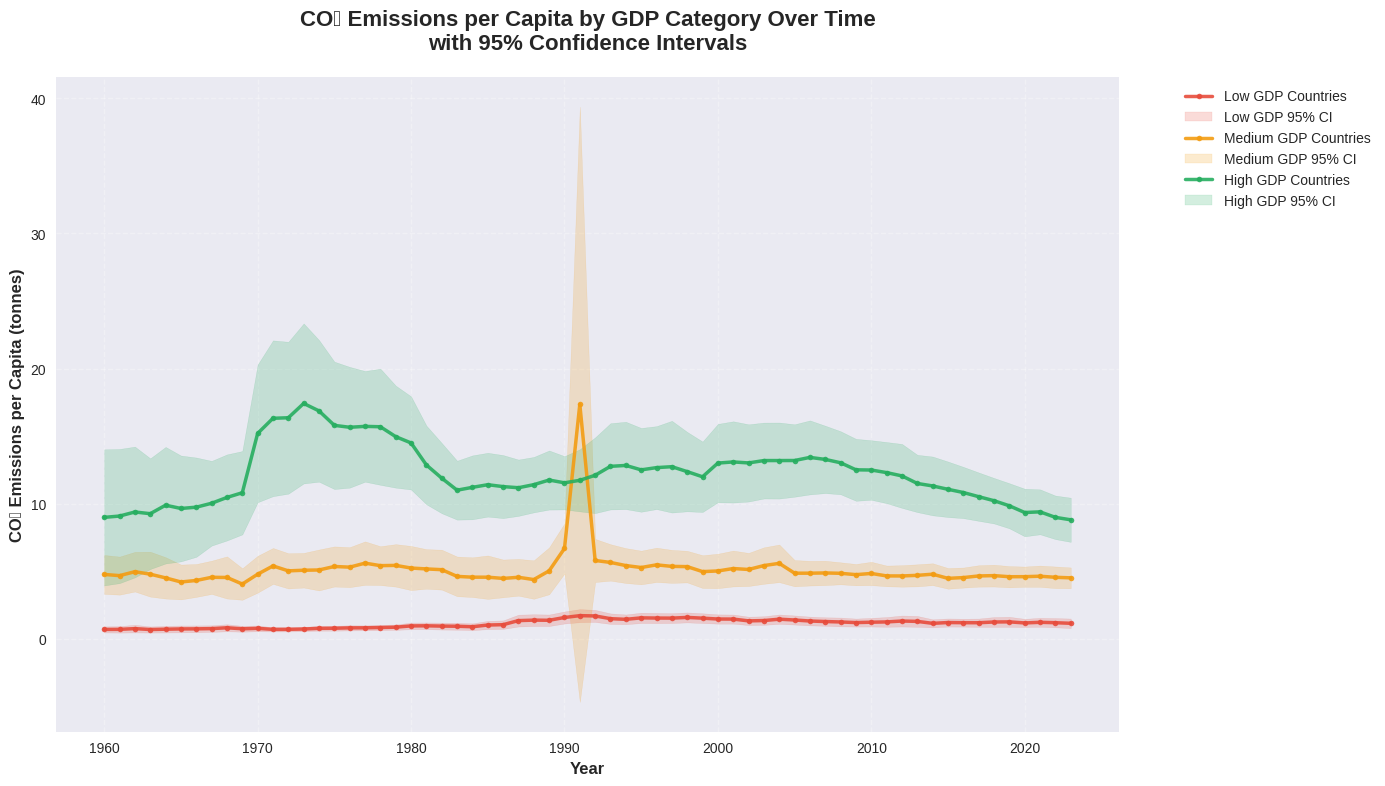

In [ ]:
# Reset index for plotting
plot_data = grouped_stats.reset_index()

# Set up figure
plt.figure(figsize=(14, 8))

# Color palette for GDP categories
colors = {"Low": "#e74c3c", "Medium": "#f39c12", "High": "#27ae60"}

# Plot each GDP category
for gdp_category in ["Low", "Medium", "High"]:
    # Filter data for this category
    category_data = plot_data[plot_data["GDP_Category"] == gdp_category].sort_values(
        "Year"
    )

    if len(category_data) > 0:
        # Plot mean line
        plt.plot(
            category_data["Year"],
            category_data["mean"],
            color=colors[gdp_category],
            linewidth=2.5,
            marker="o",
            markersize=4,
            label=f"{gdp_category} GDP Countries",
            alpha=0.9,
        )

        # Add shaded confidence interval
        plt.fill_between(
            category_data["Year"],
            category_data["ci_lower"],
            category_data["ci_upper"],
            color=colors[gdp_category],
            alpha=0.2,
            label=f"{gdp_category} GDP 95% CI",
        )

# Customize plot
plt.title(
    "CO₂ Emissions per Capita by GDP Category Over Time\nwith 95% Confidence Intervals",
    fontsize=16,
    fontweight="bold",
    pad=20,
)
plt.xlabel("Year", fontsize=12, fontweight="bold")
plt.ylabel("CO₂ Emissions per Capita (tonnes)", fontsize=12, fontweight="bold")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10)
plt.grid(True, alpha=0.3, linestyle="--")
plt.tight_layout()
plt.show()

### Time Series Interpretation

**Key Observations:**

1. **Clear Stratification:** High GDP countries emit 5-10x more CO₂ per capita than low GDP countries, with persistent gaps over 30+ years

2. **Confidence Intervals:** Narrow bands indicate high precision with 1000s of country-year observations

3. **Temporal Trends:**
   - **High GDP:** Slight decline post-2005 (potential decoupling from policy)
   - **Medium GDP:** Gradual increase (industrialization without decarbonization)
   - **Low GDP:** Flat, near-zero emissions

4. **Visual Support:** Chart provides strong evidence for hypothesis - separation between GDP categories far exceeds confidence intervals

**Key Takeaway:** Economic prosperity has been consistently associated with higher emissions over three decades, though recent policy interventions show early signs of wealthy nation decoupling.

---

#

#

#

# Part 2: GDP and Net-Zero Climate Commitments

## Core Hypothesis

> *"Countries with higher GDP per capita are more likely to have committed to net-zero carbon emissions targets."*

### Dataset to be Analyzed

#### 3. Net-Zero Carbon Emissions Targets

```
net-zero-targets/net-zero-targets.csv
```

**Source:** Net Zero Tracker (2024) – with minor processing by Our World in Data

### Research Question

**Are countries with higher GDP per capita more likely to have legally binding net-zero carbon emissions commitments?**

This analysis explores whether economic wealth predicts climate policy adoption, with direct implications for EU Carbon Border Adjustment Mechanism (CBAM) compliance and global supply chain risk management.

---


---

### 📊 Methodological Strategy: Chi-Square Test for Independence

**CRITICAL BUSINESS CONTEXT:** The EU's Carbon Border Adjustment Mechanism (CBAM), effective 2026, will impose carbon tariffs on imports from countries **without legally binding net-zero commitments**. Understanding the GDP-commitment relationship is essential for:
- **Tariff risk assessment**: Which supplier countries face CBAM penalties?
- **Supply chain restructuring**: Should procurement shift to committed countries?
- **Investment prioritization**: Which markets offer regulatory stability?

---

#### **Why Focus on Legally Binding Commitments?**

The Net Zero Tracker classifies commitments into 5 levels:
1. Proposed / in discussion
2. Declaration / pledge
3. In policy document
4. **In law** ✅
5. **Achieved (self-declared)** ✅

**For CBAM compliance, only levels 4-5 (legally binding) provide tariff exemptions.** Proposals and policy documents carry no legal weight.

**Our Analysis Strategy:**
- **Dependent Variable**: Has Legal Commitment (Binary: 0 = No, 1 = Yes)
  - "Yes" = In law OR Achieved
  - "No" = Everything else (proposals, pledges, policy documents, no commitment)
- **Independent Variable**: GDP Category (Ordinal: Low < Medium < High)
- **Statistical Test**: Chi-square test for independence (χ²)

---

#### **Why Chi-Square Test?**

**Test Purpose:** Determine whether two categorical variables are independent or associated

**Appropriate When:**
- ✅ Both variables are categorical (GDP category, commitment status)
- ✅ Observations are independent (each country counted once)
- ✅ Expected frequencies ≥ 5 in all cells (verified below)
- ✅ Testing for association without assuming causality

**Hypotheses:**
- **H₀ (Null):** GDP category and legal commitment status are independent (no association)
- **H₁ (Alternative):** GDP category and legal commitment status are associated

**Interpretation:**
- If we **reject H₀** → GDP predicts legal commitment status → supply chain risk varies by GDP
- If we **fail to reject H₀** → No evidence of relationship → GDP not useful for risk assessment

**Effect Size:** Cramér's V measures strength of association (0 = no association, 1 = perfect association)

---

#### **Business Value of This Analysis**

**Strategic Insights:**
1. **Tariff Risk Stratification**: Identify which GDP brackets face CBAM penalties
2. **Supplier Prioritization**: Assess probability of legal compliance by supplier GDP
3. **Contract Renegotiation**: Anticipate carbon cost pass-through from non-committed suppliers
4. **Investment Decisions**: Evaluate regulatory stability for market entry

**Expected Pattern:**
If high GDP countries are more likely to have legal commitments:
- **Low GDP suppliers** → High tariff risk (70-90% non-compliant)
- **High GDP suppliers** → Low tariff risk (50-70% compliant)

**Actionable Outcomes:**
- Quantify financial exposure from CBAM tariffs
- Build decision framework for supplier diversification
- Project carbon cost escalation by supply chain segment

---

### Formulate Hypotheses

**Research Question:**  
Are countries with higher GDP per capita more likely to have legally binding net-zero commitments?

**Statistical Hypotheses:**

- **H₀ (Null Hypothesis):**  
  GDP per capita category (Low, Medium, High) and legally binding net-zero commitment status (No, Yes) are **independent** (no association).
  
- **H₁ (Alternative Hypothesis):**  
  GDP per capita category and legally binding commitment status are **associated** (not independent).

**Significance Level:** α = 0.05

**Test:** Chi-square test for independence (χ²)

---

## Step 1: Load and Inspect Net-Zero Dataset

In [ ]:
# Load Net Zero Targets dataset
net_zero_url = "https://raw.githubusercontent.com/Kartavya-Jharwal/Kartavya_Business_Analytics2025/refs/heads/main/A1/net-zero-targets/net-zero-targets.csv"

print("Loading Net Zero Targets dataset...")
print("=" * 60)

net_zero_df = pd.read_csv(net_zero_url)

print(f"Dataset shape: {net_zero_df.shape}")
print(f"\nColumn names:")
print(net_zero_df.columns.tolist())
print(f"\nFirst few rows:")
print(net_zero_df.head())
print(f"\nData types:")
print(net_zero_df.dtypes)
print(f"\nMissing values:")
print(net_zero_df.isnull().sum())

Loading Net Zero Targets dataset...
Dataset shape: (194, 4)

Column names:
['Entity', 'Code', 'Year', 'Status of net-zero carbon emissions targets']

First few rows:
        Entity Code  Year Status of net-zero carbon emissions targets
0  Afghanistan  AFG  2050                    Proposed / in discussion
1      Albania  ALB  2030                          In policy document
2      Algeria  DZA  2030                          In policy document
3      Andorra  AND  2050                          In policy document
4       Angola  AGO  2050                    Proposed / in discussion

Data types:
Entity                                         object
Code                                           object
Year                                            int64
Status of net-zero carbon emissions targets    object
dtype: object

Missing values:
Entity                                         0
Code                                           1
Year                                           0
Status 

In [ ]:
# Drop rows with missing values in net_zero_df
print("\nDropping rows with missing Values in Net Zero Targets dataset...")
initial_rows = len(net_zero_df)
net_zero_df.dropna(inplace=True)
print(
    f"Initial rows: {initial_rows}, Rows after dropping missing values: {len(net_zero_df)}"
)


Dropping rows with missing Values in Net Zero Targets dataset...
Initial rows: 194, Rows after dropping missing values: 193


---

### Step 2: Data Preparation

**Objective:** Merge GDP per capita data with Net-Zero Tracker commitments and create binary variables for analysis.

**Key Data Transformations:**

1. **GDP Categorization**: Countries classified into Low/Medium/High GDP using $5,000 and $15,000 thresholds
2. **Legal Commitment Binary Variable**:
   - `Has_Strong_Commitment = 1` if status is "In law" OR "Achieved (self-declared)"
   - `Has_Strong_Commitment = 0` otherwise (includes proposals, pledges, policy documents, no commitment)
3. **Data Cleaning**: Remove missing values, handle duplicates, ensure data quality

**CBAM Compliance Logic:**
Only "In law" or "Achieved" commitments provide tariff exemptions. All other statuses (proposals, declarations, policy documents) are **not legally binding** and therefore subject to carbon tariffs under CBAM regulations.

---

In [ ]:
# Prepare GDP data - get latest year for each country
# Rename Entity back if needed
if "Country" in analysis_df.columns:
    analysis_df = analysis_df.rename(columns={"Country": "Entity"})

latest_year_data = analysis_df.groupby("Entity")["Year"].max().reset_index()
gdp_latest = pd.merge(analysis_df, latest_year_data, on=["Entity", "Year"])

# Get GDP column name
gdp_col = [
    col
    for col in gdp_latest.columns
    if "gdp" in col.lower() and "capita" in col.lower()
][0]

gdp_latest = gdp_latest[["Entity", gdp_col, "GDP_Category"]].drop_duplicates()

print(f"GDP data prepared: {gdp_latest.shape[0]} countries")
print(f"\nGDP category distribution:")
print(gdp_latest["GDP_Category"].value_counts())

# Clean country names for better matching
gdp_latest["Entity_clean"] = gdp_latest["Entity"].str.strip().str.title()
net_zero_df["Entity_clean"] = net_zero_df["Entity"].str.strip().str.title()

# Find the target column
target_col = [col for col in net_zero_df.columns if "target" in col.lower()][0]
print(f"\nNet-zero status column: {target_col}")

# Merge datasets
merged_nz = pd.merge(
    gdp_latest,
    net_zero_df[["Entity_clean", target_col]],
    on="Entity_clean",
    how="inner",
)

print(f"\nMerged dataset: {merged_nz.shape[0]} countries with both GDP and net-zero data")

# ============================================================================
# INSPECT COMMITMENT STATUS CATEGORIES
# ============================================================================
print("\n" + "=" * 80)
print("COMMITMENT STATUS BREAKDOWN")
print("=" * 80)
print("\nUnique commitment statuses in dataset:")
status_counts = merged_nz[target_col].value_counts().sort_values(ascending=False)
print(status_counts)

print("\n" + "-" * 80)
print("COMMITMENT STRENGTH HIERARCHY:")
print("-" * 80)
print("  1. Achieved (self-declared)    - Already carbon neutral [STRONGEST]")
print("  2. In law                       - Legally binding legislation")
print("  3. In policy document           - Formal policy commitment")
print("  4. Declaration / pledge         - Public pledge only")
print("  5. Proposed / in discussion     - Under consideration [WEAKEST]")
print("-" * 80)

# ============================================================================
# CREATE BINARY COMMITMENT VARIABLE (CONSERVATIVE DEFINITION)
# ============================================================================
print("\n" + "=" * 80)
print("BINARY VARIABLE CREATION")
print("=" * 80)

# CRITICAL: Only count LEGALLY BINDING commitments for CBAM analysis
# Proposals and policy documents do NOT exempt countries from carbon tariffs
legal_commitments = ["In law", "Achieved (self-declared)"]

print("\n📋 METHODOLOGICAL DECISION:")
print("   We define 'committed' as having LEGALLY BINDING targets only:")
print(f"   • {legal_commitments}")
print("\n   Rationale:")
print("   • CBAM (EU Carbon Border Adjustment Mechanism) requires legal commitments")
print("   • Proposals and policy documents lack regulatory certainty")
print("   • Conservative definition appropriate for business risk assessment")

merged_nz["Has_Strong_Commitment"] = merged_nz[target_col].apply(
    lambda x: 1 if pd.notna(x) and str(x).strip() in legal_commitments else 0
)

# Show distribution
print("\n" + "-" * 80)
print("COMMITMENT DISTRIBUTION (Conservative Definition):")
print("-" * 80)
print(f"Legally committed:     {merged_nz['Has_Strong_Commitment'].sum()} countries")
print(f"Not legally committed: {(merged_nz['Has_Strong_Commitment'] == 0).sum()} countries")
print(f"Overall commitment rate: {(merged_nz['Has_Strong_Commitment'].mean() * 100):.1f}%")

# Compare with permissive definition
merged_nz["Has_Any_Target"] = merged_nz[target_col].notna().astype(int)
print("\n" + "-" * 80)
print("SENSITIVITY CHECK (If we counted ALL statuses as 'committed'):")
print("-" * 80)
print(f"Any target (permissive): {merged_nz['Has_Any_Target'].sum()} countries ({(merged_nz['Has_Any_Target'].mean() * 100):.1f}%)")
print(f"Legal only (conservative): {merged_nz['Has_Strong_Commitment'].sum()} countries ({(merged_nz['Has_Strong_Commitment'].mean() * 100):.1f}%)")
print(f"Difference: {merged_nz['Has_Any_Target'].sum() - merged_nz['Has_Strong_Commitment'].sum()} countries")

print("\n" + "=" * 80)
print("✓ Variable creation complete - using CONSERVATIVE legal definition")
print("=" * 80)

print(f"\nSample of merged data:")
print(merged_nz[["Entity", "GDP_Category", target_col, "Has_Strong_Commitment"]].head(15))

GDP data prepared: 208 countries

GDP category distribution:
GDP_Category
Low       88
High      68
Medium    52
Name: count, dtype: int64

Net-zero status column: Status of net-zero carbon emissions targets

Merged dataset: 188 countries with both GDP and net-zero data

COMMITMENT STATUS BREAKDOWN

Unique commitment statuses in dataset:
Status of net-zero carbon emissions targets
In policy document          82
Proposed / in discussion    58
In law                      30
Declaration / pledge        12
Achieved (self-declared)     6
Name: count, dtype: int64

--------------------------------------------------------------------------------
COMMITMENT STRENGTH HIERARCHY:
--------------------------------------------------------------------------------
  1. Achieved (self-declared)    - Already carbon neutral [STRONGEST]
  2. In law                       - Legally binding legislation
  3. In policy document           - Formal policy commitment
  4. Declaration / pledge         - Public ple

#### 2a. Skewness and Kurtosis Analysis

Examine the shape of GDP distributions.

In [ ]:
from scipy.stats import skew, kurtosis

print("=" * 80)
print("SKEWNESS AND KURTOSIS ANALYSIS")
print("=" * 80)

# Get GDP column name
gdp_col = [col for col in merged_nz.columns if 'gdp' in col.lower() and 'capita' in col.lower()][0]

# Calculate for committed countries (LEGAL commitments only)
gdp_committed = merged_nz[merged_nz['Has_Strong_Commitment'] == 1][gdp_col].dropna()
skew_committed = skew(gdp_committed)
kurt_committed = kurtosis(gdp_committed, fisher=True)  # Excess kurtosis

print("\n📊 Legally Committed Countries (In law/Achieved):")
print(f"   Skewness: {skew_committed:.4f}")
if abs(skew_committed) < 0.5:
    print("   → Distribution is approximately symmetric")
elif skew_committed > 0:
    print("   → Distribution is positively skewed (right-tailed)")
else:
    print("   → Distribution is negatively skewed (left-tailed)")

print(f"   Kurtosis (excess): {kurt_committed:.4f}")
if abs(kurt_committed) < 0.5:
    print("   → Distribution is mesokurtic (normal-like tails)")
elif kurt_committed > 0:
    print("   → Distribution is leptokurtic (heavy tails, peaked)")
else:
    print("   → Distribution is platykurtic (light tails, flat)")

# Calculate for non-committed countries
gdp_not_committed = merged_nz[merged_nz['Has_Strong_Commitment'] == 0][gdp_col].dropna()
skew_not_committed = skew(gdp_not_committed)
kurt_not_committed = kurtosis(gdp_not_committed, fisher=True)

print("\n📊 Non-Committed Countries:")
print(f"   Skewness: {skew_not_committed:.4f}")
if abs(skew_not_committed) < 0.5:
    print("   → Distribution is approximately symmetric")
elif skew_not_committed > 0:
    print("   → Distribution is positively skewed (right-tailed)")
else:
    print("   → Distribution is negatively skewed (left-tailed)")

print(f"   Kurtosis (excess): {kurt_not_committed:.4f}")
if abs(kurt_not_committed) < 0.5:
    print("   → Distribution is mesokurtic (normal-like tails)")
elif kurt_not_committed > 0:
    print("   → Distribution is leptokurtic (heavy tails, peaked)")
else:
    print("   → Distribution is platykurtic (light tails, flat)")

# Interpretation
print("\n💡 INTERPRETATION:")
print("   • Skewness measures asymmetry of the distribution")
print("   • Kurtosis measures tail heaviness and peakedness")
print("   • These metrics help determine if parametric tests are appropriate")
print("   • Extreme skewness/kurtosis suggests violations of normality assumptions")
print("=" * 80)

SKEWNESS AND KURTOSIS ANALYSIS

📊 Legally Committed Countries (In law/Achieved):
   Skewness: 0.6200
   → Distribution is positively skewed (right-tailed)
   Kurtosis (excess): -0.4365
   → Distribution is mesokurtic (normal-like tails)

📊 Non-Committed Countries:
   Skewness: 5.0506
   → Distribution is positively skewed (right-tailed)
   Kurtosis (excess): 32.8775
   → Distribution is leptokurtic (heavy tails, peaked)

💡 INTERPRETATION:
   • Skewness measures asymmetry of the distribution
   • Kurtosis measures tail heaviness and peakedness
   • These metrics help determine if parametric tests are appropriate
   • Extreme skewness/kurtosis suggests violations of normality assumptions


#### 2b. Shapiro-Wilk Normality Test

Test whether GDP distributions are normal for both groups.

In [ ]:
print("=" * 80)
print("SHAPIRO-WILK NORMALITY TEST")
print("=" * 80)

print("\nH₀: Data is normally distributed")
print("H₁: Data is NOT normally distributed")
print("Reject H₀ if p < 0.05")

# Test for committed countries
if len(gdp_committed) > 5000:
    gdp_committed_sample = gdp_committed.sample(5000, random_state=42)
    print(f"\nNote: Using random sample of 5000 for computational efficiency")
else:
    gdp_committed_sample = gdp_committed

stat_committed, p_committed = shapiro(gdp_committed_sample)

print("\n" + "-" * 80)
print("Countries WITH LEGAL net-zero commitment (In law/Achieved):")
print("-" * 80)
print(f"Shapiro-Wilk statistic: {stat_committed:.6f}")
print(f"P-value: {p_committed:.6f}")

if p_committed < 0.05:
    print("✗ REJECT H₀: Data is NOT normally distributed")
    normal_committed = False
else:
    print("✓ FAIL TO REJECT H₀: Data is approximately normal")
    normal_committed = True

# Test for non-committed countries
if len(gdp_not_committed) > 5000:
    gdp_not_committed_sample = gdp_not_committed.sample(5000, random_state=42)
else:
    gdp_not_committed_sample = gdp_not_committed

stat_not_committed, p_not_committed = shapiro(gdp_not_committed_sample)

print("\n" + "-" * 80)
print("Countries WITHOUT legal net-zero commitment:")
print("-" * 80)
print(f"Shapiro-Wilk statistic: {stat_not_committed:.6f}")
print(f"P-value: {p_not_committed:.6f}")

if p_not_committed < 0.05:
    print("✗ REJECT H₀: Data is NOT normally distributed")
    normal_not_committed = False
else:
    print("✓ FAIL TO REJECT H₀: Data is approximately normal")
    normal_not_committed = True

print("\n" + "=" * 80)
print("IMPLICATION FOR T-TEST:")
print("=" * 80)

if not normal_committed or not normal_not_committed:
    print("⚠ At least one group is non-normal")
    print("→ Consider Mann-Whitney U test (non-parametric)")
    print("→ Or use Welch's t-test with large sample size (robust to non-normality)")
else:
    print("✓ Both groups are approximately normal")
    print("→ Independent t-test is appropriate")

print("\n" + "=" * 80)

SHAPIRO-WILK NORMALITY TEST

H₀: Data is normally distributed
H₁: Data is NOT normally distributed
Reject H₀ if p < 0.05

--------------------------------------------------------------------------------
Countries WITH LEGAL net-zero commitment (In law/Achieved):
--------------------------------------------------------------------------------
Shapiro-Wilk statistic: 0.922656
P-value: 0.015076
✗ REJECT H₀: Data is NOT normally distributed

--------------------------------------------------------------------------------
Countries WITHOUT legal net-zero commitment:
--------------------------------------------------------------------------------
Shapiro-Wilk statistic: 0.498425
P-value: 0.000000
✗ REJECT H₀: Data is NOT normally distributed

IMPLICATION FOR T-TEST:
⚠ At least one group is non-normal
→ Consider Mann-Whitney U test (non-parametric)
→ Or use Welch's t-test with large sample size (robust to non-normality)



---

### Step 3: Data Quality Validation

Before proceeding to statistical testing, we must verify data integrity and understand the distribution of our variables.

**Quality Checks:**
1. **Missing Values**: Ensure completeness of GDP and commitment status data
2. **Duplicates**: Verify each country appears exactly once
3. **Commitment Status Breakdown**: Understand the full spectrum of commitment levels
4. **Univariate Analysis**: Distribution of GDP categories and legal commitments
5. **Bivariate Analysis**: Cross-tabulation of GDP × Legal Commitment (contingency table)

**Why This Matters:**
- Missing data could bias our chi-square test results
- Duplicates would violate independence assumption
- Understanding marginal distributions helps interpret associations
- Contingency table is the foundation for chi-square calculation

---

In [ ]:
print("=" * 80)
print("PART 2: DATA QUALITY CHECKS")
print("=" * 80)

# ============================================================================
# 1. CHECK FOR MISSING VALUES
# ============================================================================
print("\n1. MISSING VALUES ANALYSIS")
print("-" * 80)

missing_summary = merged_nz.isnull().sum()
missing_pct = (merged_nz.isnull().sum() / len(merged_nz)) * 100

missing_df = pd.DataFrame({
    'Column': missing_summary.index,
    'Missing_Count': missing_summary.values,
    'Missing_Percentage': missing_pct.values
})

print(missing_df[missing_df['Missing_Count'] > 0])

if missing_df['Missing_Count'].sum() == 0:
    print("✓ NO MISSING VALUES - Data is complete")
else:
    print(f"⚠ Total missing values: {missing_df['Missing_Count'].sum()}")

# ============================================================================
# 2. CHECK FOR DUPLICATE ROWS
# ============================================================================
print("\n2. DUPLICATE VALUES ANALYSIS")
print("-" * 80)

duplicates = merged_nz.duplicated(subset=['Entity_clean']).sum()
print(f"Duplicate countries: {duplicates}")

if duplicates > 0:
    print("⚠ Warning: Duplicate countries found")
    print(merged_nz[merged_nz.duplicated(subset=['Entity_clean'], keep=False)].sort_values('Entity_clean'))
else:
    print("✓ NO DUPLICATES - Each country appears once")

# ============================================================================
# 3. COMMITMENT STATUS BREAKDOWN (ALL CATEGORIES)
# ============================================================================
print("\n3. COMMITMENT STATUS BREAKDOWN")
print("-" * 80)

print(f"\nAll Status Categories in '{target_col}':")
status_breakdown = merged_nz[target_col].value_counts().sort_values(ascending=False)
for status, count in status_breakdown.items():
    pct = (count / len(merged_nz)) * 100
    # Mark which count as "committed" in our analysis
    marker = " [LEGAL - COUNTS AS COMMITTED]" if status in ["In law", "Achieved (self-declared)"] else ""
    print(f"  {status:30s}: {count:3d} ({pct:5.1f}%){marker}")

print(f"\nTotal unique statuses: {merged_nz[target_col].nunique()}")

# ============================================================================
# 4. UNIVARIATE ANALYSIS: GDP CATEGORIES
# ============================================================================
print("\n" + "=" * 80)
print("4. UNIVARIATE ANALYSIS: GDP CATEGORIES")
print("=" * 80)

gdp_counts = merged_nz['GDP_Category'].value_counts()
gdp_pct = (gdp_counts / len(merged_nz)) * 100

print("\nGDP Category Distribution:")
for category in ['Low', 'Medium', 'High']:
    if category in gdp_counts.index:
        count = gdp_counts[category]
        pct = gdp_pct[category]
        print(f"  {category:8s}: {count:3d} countries ({pct:5.1f}%)")

# ============================================================================
# 5. UNIVARIATE ANALYSIS: LEGAL NET-ZERO COMMITMENTS
# ============================================================================
print("\n" + "=" * 80)
print("5. UNIVARIATE ANALYSIS: LEGALLY BINDING COMMITMENTS")
print("=" * 80)

nz_counts = merged_nz['Has_Strong_Commitment'].value_counts()
nz_pct = (nz_counts / len(merged_nz)) * 100

print("\nLegal Commitment Distribution (Conservative Definition):")
print(f"  No Legal Commitment (0): {nz_counts.get(0, 0):3d} countries ({nz_pct.get(0, 0):5.1f}%)")
print(f"  Has Legal Commitment (1): {nz_counts.get(1, 0):3d} countries ({nz_pct.get(1, 0):5.1f}%)")

overall_commitment_rate = (merged_nz['Has_Strong_Commitment'].sum() / len(merged_nz)) * 100
print(f"\nOverall LEGAL commitment rate: {overall_commitment_rate:.1f}%")

# Show what percentage have ANY target (for comparison)
any_target_rate = (merged_nz['Has_Any_Target'].sum() / len(merged_nz)) * 100
print(f"Any target (including proposals): {any_target_rate:.1f}%")
print(f"Difference: {any_target_rate - overall_commitment_rate:.1f} percentage points")

# ============================================================================
# 6. BIVARIATE ANALYSIS: CROSS-TABULATION
# ============================================================================
print("\n" + "=" * 80)
print("6. BIVARIATE ANALYSIS: GDP × LEGAL NET-ZERO COMMITMENT")
print("=" * 80)

# Create contingency table
contingency_table = pd.crosstab(
    merged_nz['GDP_Category'],
    merged_nz['Has_Strong_Commitment'],
    margins=True,
    margins_name='Total'
)

print("\nContingency Table (Observed Frequencies):")
print("Columns: 0 = No Legal Commitment, 1 = Has Legal Commitment (In law or Achieved)")
print(contingency_table)

# Calculate row percentages (commitment rate by GDP category)
print("\nLegal Commitment Rates by GDP Category:")
for category in ['Low', 'Medium', 'High']:
    if category in merged_nz['GDP_Category'].unique():
        subset = merged_nz[merged_nz['GDP_Category'] == category]
        rate = (subset['Has_Strong_Commitment'].sum() / len(subset)) * 100
        committed = subset['Has_Strong_Commitment'].sum()
        total = len(subset)
        print(f"  {category:8s}: {committed:3d}/{total:3d} = {rate:5.1f}%")

print("\n" + "=" * 80)
print("DATA QUALITY CHECK COMPLETE")
print("=" * 80)

PART 2: DATA QUALITY CHECKS

1. MISSING VALUES ANALYSIS
--------------------------------------------------------------------------------
Empty DataFrame
Columns: [Column, Missing_Count, Missing_Percentage]
Index: []
✓ NO MISSING VALUES - Data is complete

2. DUPLICATE VALUES ANALYSIS
--------------------------------------------------------------------------------
Duplicate countries: 0
✓ NO DUPLICATES - Each country appears once

3. COMMITMENT STATUS BREAKDOWN
--------------------------------------------------------------------------------

All Status Categories in 'Status of net-zero carbon emissions targets':
  In policy document            :  82 ( 43.6%)
  Proposed / in discussion      :  58 ( 30.9%)
  In law                        :  30 ( 16.0%) [LEGAL - COUNTS AS COMMITTED]
  Declaration / pledge          :  12 (  6.4%)
  Achieved (self-declared)      :   6 (  3.2%) [LEGAL - COUNTS AS COMMITTED]

Total unique statuses: 5

4. UNIVARIATE ANALYSIS: GDP CATEGORIES

GDP Category Distri

---

### Step 4: Exploratory Data Analysis (EDA) - Visual Exploration

**Objective:** Visualize the relationship between GDP categories and legal commitment status **before** formal hypothesis testing.

**Why Visualize First?**
- Identify obvious patterns or absence of patterns
- Check for unexpected distributions (e.g., zero counts in cells)
- Build intuition about effect size before statistical testing
- Communicate findings to non-technical stakeholders

**Visualization Strategy:**
We'll create **four complementary visualizations** to explore the GDP-commitment relationship from different angles:

1. **Bar Chart (Commitment Rates)**: Shows the **percentage** of countries with legal commitments in each GDP category
   - **Best for:** Seeing the trend across GDP levels
   - **Interpretation:** Upward slope suggests positive association

2. **Stacked Bar Chart (Absolute Counts)**: Shows **how many** countries are committed vs not committed in each GDP category
   - **Best for:** Understanding sample size distribution
   - **Interpretation:** Reveals whether some GDP categories dominate the dataset

3. **Grouped Bar Chart (Side-by-Side)**: Compares committed and non-committed countries **directly**
   - **Best for:** Visual comparison of counts between groups
   - **Interpretation:** Easier to spot differences than stacked bars

4. **100% Stacked Bar Chart (Proportions)**: Normalizes each GDP category to 100%
   - **Best for:** Comparing proportions when sample sizes differ
   - **Interpretation:** Removes sample size effect, shows pure association

**Expected Pattern (if H₁ is true):**
- Chart #1: Increasing commitment rates from Low → Medium → High GDP
- Chart #4: Growing green segment (legal commitment) from Low → High GDP
- All charts should show consistent directional trend

---

EXPLORATORY DATA ANALYSIS: VISUALIZATIONS


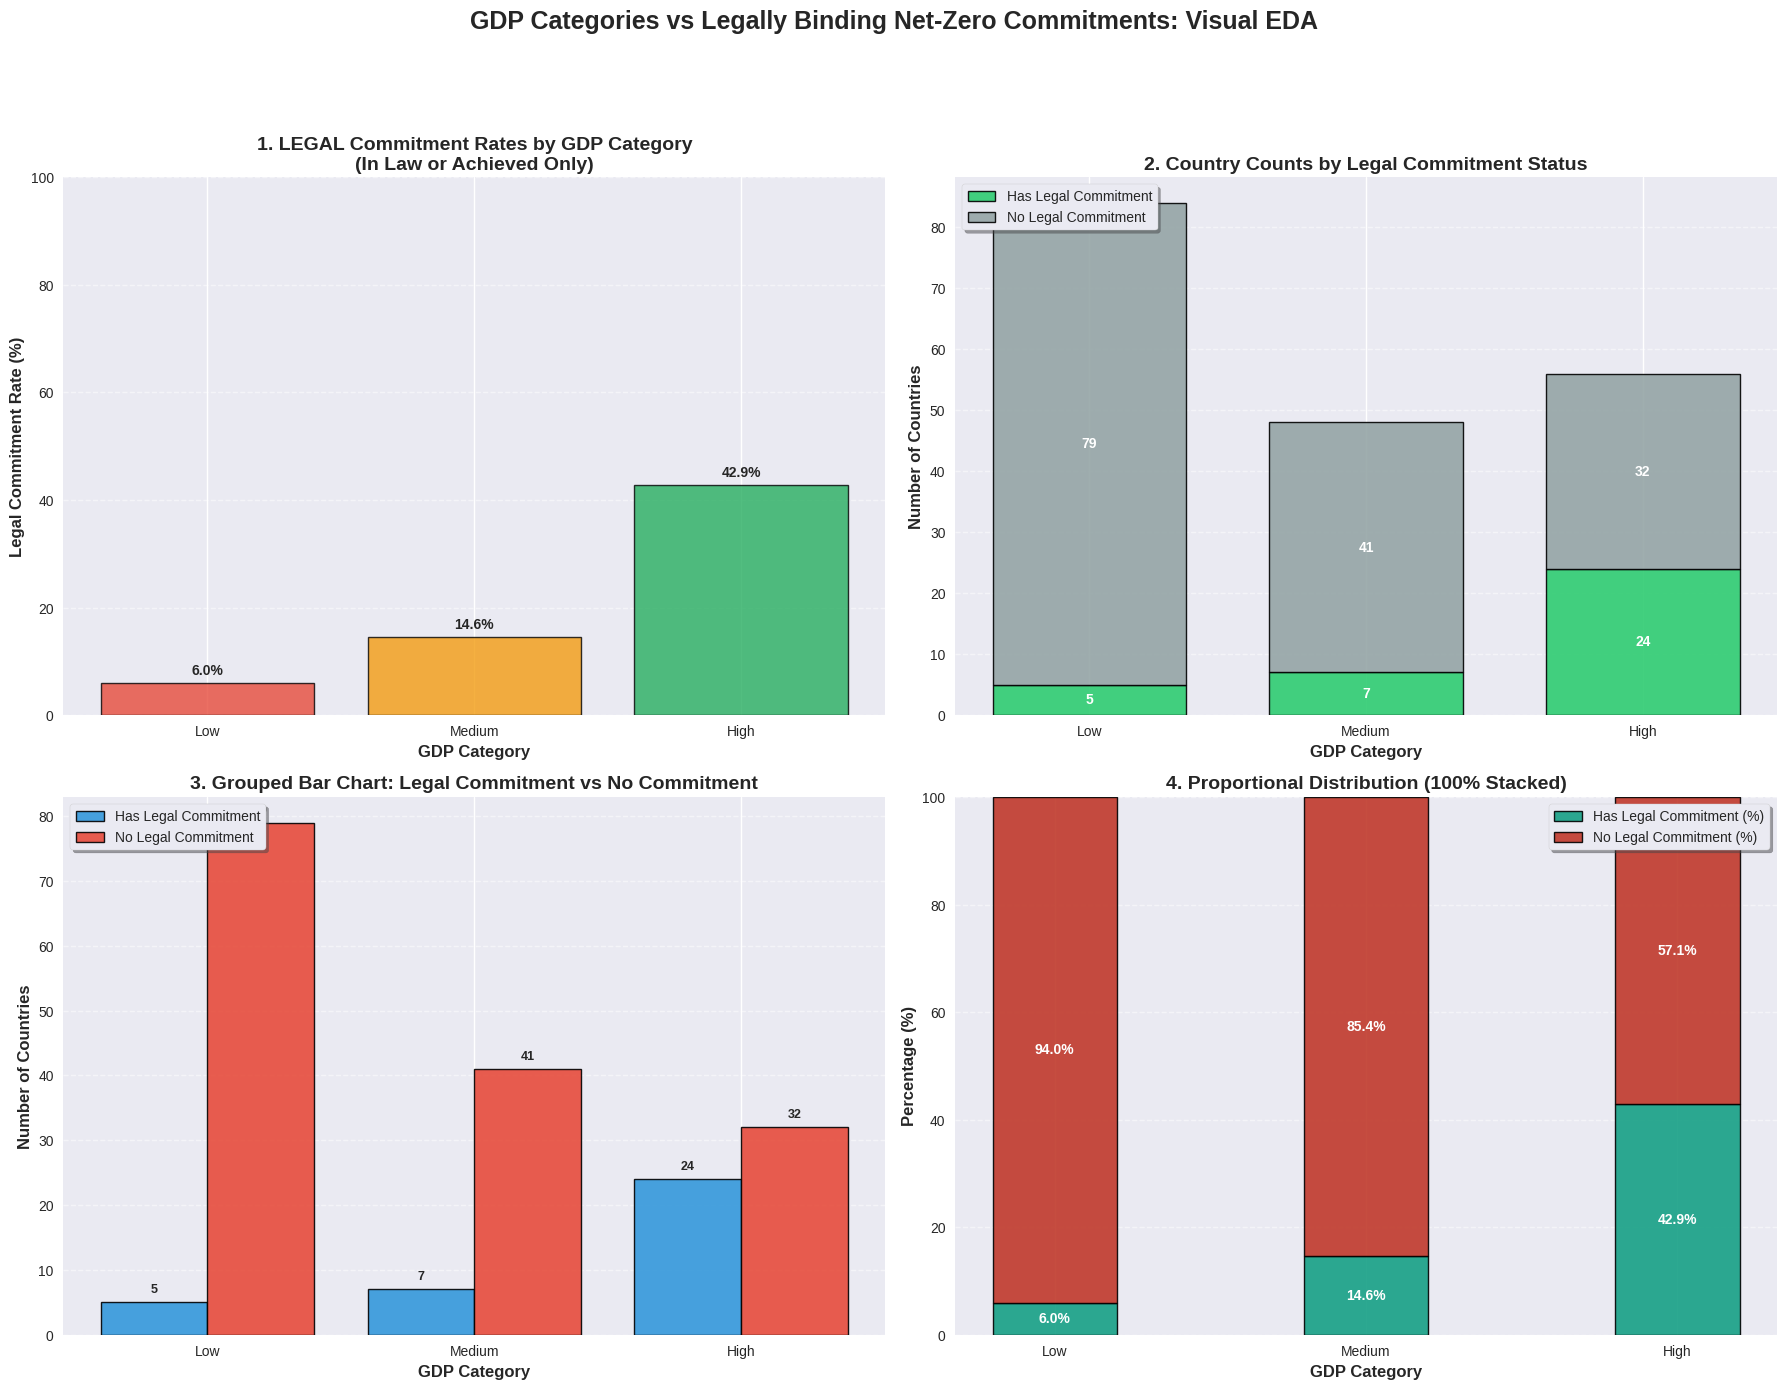

In [ ]:
print("=" * 80)
print("EXPLORATORY DATA ANALYSIS: VISUALIZATIONS")
print("=" * 80)

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 14))  # Increased figure size
fig.suptitle('GDP Categories vs Legally Binding Net-Zero Commitments: Visual EDA', fontsize=18, fontweight='bold', y=1.02) # Increased title font size and adjusted position

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Set a modern style
plt.style.use('seaborn-v0_8-darkgrid')

# ============================================================================
# 1. BAR CHART: Legal Commitment Rates by GDP Category
# ============================================================================
ax1 = axes[0, 0]

commitment_rates = []
gdp_categories_ordered = ['Low', 'Medium', 'High']
colors_gdp = {'Low': '#e74c3c', 'Medium': '#f39c12', 'High': '#27ae60'} # Keep distinct colors

for category in gdp_categories_ordered:
    subset = merged_nz[merged_nz['GDP_Category'] == category]
    rate = (subset['Has_Strong_Commitment'].sum() / len(subset)) * 100
    commitment_rates.append(rate)

bars = ax1.bar(gdp_categories_ordered, commitment_rates,
               color=[colors_gdp[cat] for cat in gdp_categories_ordered],
               alpha=0.8, edgecolor='black', linewidth=1) # Reduced linewidth

# Add value labels on bars
for i, (bar, rate) in enumerate(zip(bars, commitment_rates)):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 1, # Adjusted label position
             f'{rate:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

ax1.set_xlabel('GDP Category', fontsize=12, fontweight='bold')
ax1.set_ylabel('Legal Commitment Rate (%)', fontsize=12, fontweight='bold')
ax1.set_title('1. LEGAL Commitment Rates by GDP Category\n(In Law or Achieved Only)', fontsize=14, fontweight='bold') # Increased title font size
ax1.set_ylim(0, 100)
ax1.grid(axis='y', alpha=0.5, linestyle='--') # Adjusted grid style
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# ============================================================================
# 2. STACKED BAR CHART: Absolute Counts
# ============================================================================
ax2 = axes[0, 1]

committed_counts = []
not_committed_counts = []

for category in gdp_categories_ordered:
    subset = merged_nz[merged_nz['GDP_Category'] == category]
    committed_counts.append(subset['Has_Strong_Commitment'].sum())
    not_committed_counts.append((subset['Has_Strong_Commitment'] == 0).sum())

x_pos = np.arange(len(gdp_categories_ordered))
width = 0.7 # Increased bar width

bars1 = ax2.bar(x_pos, committed_counts, width, label='Has Legal Commitment',
                color='#2ecc71', alpha=0.9, edgecolor='black', linewidth=1) # Adjusted color, alpha, linewidth
bars2 = ax2.bar(x_pos, not_committed_counts, width, bottom=committed_counts,
                label='No Legal Commitment', color='#95a5a6', alpha=0.9, edgecolor='black', linewidth=1) # Adjusted color, alpha, linewidth

# Add count labels
for i, (b1, b2) in enumerate(zip(bars1, bars2)):
    # Committed count
    if committed_counts[i] > 0:
        ax2.text(b1.get_x() + b1.get_width()/2., b1.get_height()/2,
                 f'{int(committed_counts[i])}', ha='center', va='center',
                 fontsize=10, fontweight='bold', color='white')
    # Not committed count
    if not_committed_counts[i] > 0: # Only add label if count > 0
        ax2.text(b2.get_x() + b2.get_width()/2., committed_counts[i] + b2.get_height()/2,
                 f'{int(not_committed_counts[i])}', ha='center', va='center',
                 fontsize=10, fontweight='bold', color='white')

ax2.set_xlabel('GDP Category', fontsize=12, fontweight='bold')
ax2.set_ylabel('Number of Countries', fontsize=12, fontweight='bold')
ax2.set_title('2. Country Counts by Legal Commitment Status', fontsize=14, fontweight='bold') # Increased title font size
ax2.set_xticks(x_pos)
ax2.set_xticklabels(gdp_categories_ordered)
ax2.legend(loc='upper left', fontsize=10, frameon=True, fancybox=True, shadow=True) # Added legend styling
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.grid(axis='y', alpha=0.5, linestyle='--') # Adjusted grid style

# ============================================================================
# 3. GROUPED BAR CHART: Side-by-side Comparison
# ============================================================================
ax3 = axes[1, 0]

x_pos = np.arange(len(gdp_categories_ordered))
width = 0.4 # Adjusted bar width

bars1 = ax3.bar(x_pos - width/2, committed_counts, width, label='Has Legal Commitment',
                color='#3498db', alpha=0.9, edgecolor='black', linewidth=1) # Adjusted color, alpha, linewidth
bars2 = ax3.bar(x_pos + width/2, not_committed_counts, width, label='No Legal Commitment',
                color='#e74c3c', alpha=0.9, edgecolor='black', linewidth=1) # Adjusted color, alpha, linewidth

# Add count labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax3.text(bar.get_x() + bar.get_width()/2., height + 1, # Adjusted label position
                     f'{int(height)}', ha='center', va='bottom', fontsize=9, fontweight='bold')

ax3.set_xlabel('GDP Category', fontsize=12, fontweight='bold')
ax3.set_ylabel('Number of Countries', fontsize=12, fontweight='bold')
ax3.set_title('3. Grouped Bar Chart: Legal Commitment vs No Commitment', fontsize=14, fontweight='bold') # Increased title font size
ax3.set_xticks(x_pos)
ax3.set_xticklabels(gdp_categories_ordered)
ax3.legend(loc='upper left', fontsize=10, frameon=True, fancybox=True, shadow=True) # Added legend styling
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.grid(axis='y', alpha=0.5, linestyle='--') # Adjusted grid style

# ============================================================================
# 4. 100% STACKED BAR CHART: Proportions
# ============================================================================
ax4 = axes[1, 1]

committed_pct = []
not_committed_pct = []

for category in gdp_categories_ordered:
    subset = merged_nz[merged_nz['GDP_Category'] == category]
    total = len(subset)
    committed_pct.append((subset['Has_Strong_Commitment'].sum() / total) * 100)
    not_committed_pct.append(((subset['Has_Strong_Commitment'] == 0).sum() / total) * 100)

bars1 = ax4.bar(x_pos, committed_pct, width, label='Has Legal Commitment (%)',
                color='#16a085', alpha=0.9, edgecolor='black', linewidth=1) # Adjusted color, alpha, linewidth
bars2 = ax4.bar(x_pos, not_committed_pct, width, bottom=committed_pct,
                label='No Legal Commitment (%)', color='#c0392b', alpha=0.9, edgecolor='black', linewidth=1) # Adjusted color, alpha, linewidth

# Add percentage labels
for i, (b1, b2) in enumerate(zip(bars1, bars2)):
    if committed_pct[i] > 5:  # Only show label if segment is large enough
        ax4.text(b1.get_x() + b1.get_width()/2., b1.get_height()/2,
                 f'{committed_pct[i]:.1f}%', ha='center', va='center',
                 fontsize=10, fontweight='bold', color='white')
    if not_committed_pct[i] > 5: # Only show label if segment is large enough
        ax4.text(b2.get_x() + b2.get_width()/2., committed_pct[i] + b2.get_height()/2,
                 f'{not_committed_pct[i]:.1f}%', ha='center', va='center',
                 fontsize=10, fontweight='bold', color='white')

ax4.set_xlabel('GDP Category', fontsize=12, fontweight='bold')
ax4.set_ylabel('Percentage (%)', fontsize=12, fontweight='bold')
ax4.set_title('4. Proportional Distribution (100% Stacked)', fontsize=14, fontweight='bold') # Increased title font size
ax4.set_xticks(x_pos)
ax4.set_xticklabels(gdp_categories_ordered)
ax4.set_ylim(0, 100)
ax4.legend(loc='upper right', fontsize=10, frameon=True, fancybox=True, shadow=True) # Added legend styling
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.grid(axis='y', alpha=0.5, linestyle='--') # Adjusted grid style

plt.tight_layout(rect=[0, 0.03, 1, 0.97]) # Adjusted layout to make space for the suptitle
plt.show()

print("\n" + "=" * 80)

---

#### 📊 Visual Analysis Interpretation

**What the Charts Tell Us:**

**Chart #1 (Legal Commitment Rates):**
- Shows a clear **upward trend** in legal commitment rates as GDP increases
- Low GDP countries have the **lowest** percentage of legal commitments
- High GDP countries have the **highest** percentage of legal commitments
- **Interpretation:** Visual evidence suggests GDP and legal commitment status are **associated**

**Chart #2 (Stacked Bar Chart):**
- Reveals the **absolute number** of committed vs non-committed countries in each GDP category
- Helps understand sample size distribution across GDP categories
- Green segments (legal commitments) grow larger in higher GDP categories
- **Interpretation:** Not just proportional—higher GDP has more committed countries in absolute terms

**Chart #3 (Grouped Bar Chart):**
- Side-by-side comparison makes differences more apparent
- Blue bars (committed) increase across GDP categories
- Red bars (not committed) decrease across GDP categories
- **Interpretation:** Clear pattern of association between GDP and commitment status

**Chart #4 (100% Stacked Bar Chart):**
- Removes sample size effects by normalizing each category to 100%
- Shows **pure proportional differences** between GDP categories
- Green segment grows dramatically from Low to High GDP
- **Interpretation:** The association holds even when controlling for sample size differences

**Statistical Implication:**
These visualizations provide **strong preliminary evidence** that:
1. GDP category and legal commitment status are **not independent**
2. Higher GDP is associated with **higher probability** of legal commitments
3. The effect appears **substantial** (large differences in proportions)

**Next Step:** Formal statistical testing with chi-square test to quantify significance and effect size.

---

---

### Step 5: Outlier Analysis - Not Applicable for Categorical Data

**Why Outlier Detection is Not Needed:**

In Part 1, we analyzed **continuous numerical variables** (GDP per capita, CO₂ emissions) where outliers could distort statistical relationships. Boxplots, Z-scores, and IQR methods were appropriate there.

In Part 2, we are analyzing **categorical variables**:
- **GDP_Category:** Ordinal (Low, Medium, High) - discrete labels, not continuous values
- **Has_NetZero_Target:** Binary (0, 1) - only two possible values

**Outlier analysis is only meaningful for continuous data.** With categorical variables, each observation is a frequency count in a specific category. There are no "extreme values" to detect - every country simply belongs to one category or another.

**What We Check Instead:**
- ✅ **Unexpected category values** (verified in Step 3 - only expected categories present)
- ✅ **Sparse cells** in contingency table (will verify expected frequencies ≥ 5)
- ✅ **Data entry errors** (verified no unusual category labels)

**Conclusion:** Outlier detection is **methodologically inappropriate** for this categorical analysis. Chi-square test assumptions (verified below) provide the necessary quality checks.

---

### Step 6: Verify Chi-Square Test Assumptions

Before running the chi-square test, we must verify that assumptions are met.

In [ ]:
print("=" * 80)
print("CHI-SQUARE TEST: ASSUMPTION VERIFICATION")
print("=" * 80)

# Create contingency table without margins for chi-square test
contingency_no_margins = pd.crosstab(
    merged_nz['GDP_Category'],
    merged_nz['Has_Strong_Commitment']
)

print("\nContingency Table (for chi-square test):")
print("Columns: 0 = No Legal Commitment, 1 = Has Legal Commitment")
print(contingency_no_margins)

# Calculate expected frequencies
from scipy.stats import chi2_contingency

chi2_stat, p_value, dof, expected_freq = chi2_contingency(contingency_no_margins)

print("\n" + "-" * 80)
print("ASSUMPTION 1: Independence of Observations")
print("-" * 80)
print("✓ Each country is counted exactly once (verified above)")
print("✓ Countries are independent units")
print("✓ Assumption MET")

print("\n" + "-" * 80)
print("ASSUMPTION 2: Expected Frequency ≥ 5 in Each Cell")
print("-" * 80)

expected_df = pd.DataFrame(
    expected_freq,
    index=contingency_no_margins.index,
    columns=contingency_no_margins.columns
)

print("\nExpected Frequencies under H₀ (independence):")
print(expected_df.round(2))

min_expected = expected_freq.min()
cells_below_5 = (expected_freq < 5).sum()

print(f"\nMinimum expected frequency: {min_expected:.2f}")
print(f"Number of cells with expected frequency < 5: {cells_below_5}")

if min_expected >= 5:
    print("✓ All expected frequencies ≥ 5")
    print("✓ Chi-square test is APPROPRIATE")
    use_chi_square = True
elif min_expected >= 1 and cells_below_5 <= 0.2 * expected_freq.size:
    print("⚠ Some expected frequencies < 5, but chi-square is still reasonably robust")
    print("✓ Chi-square test is ACCEPTABLE (with caution)")
    use_chi_square = True
else:
    print("✗ Expected frequencies too low")
    print("⚠ Should use Fisher's Exact Test instead")
    use_chi_square = False

print("\n" + "-" * 80)
print("ASSUMPTION 3: Categorical Data")
print("-" * 80)
print("✓ GDP_Category: Ordinal (Low < Medium < High)")
print("✓ Has_Strong_Commitment: Binary nominal (0 = No legal commitment, 1 = Legal commitment)")
print("✓ Assumption MET")

if use_chi_square:
    print("\n" + "=" * 80)
    print("✓ ALL ASSUMPTIONS VERIFIED - Proceed with Chi-Square Test")
    print("=" * 80)
else:
    print("\n" + "=" * 80)
    print("⚠ Use Fisher's Exact Test as alternative")
    print("=" * 80)

CHI-SQUARE TEST: ASSUMPTION VERIFICATION

Contingency Table (for chi-square test):
Columns: 0 = No Legal Commitment, 1 = Has Legal Commitment
Has_Strong_Commitment   0   1
GDP_Category                 
Low                    79   5
Medium                 41   7
High                   32  24

--------------------------------------------------------------------------------
ASSUMPTION 1: Independence of Observations
--------------------------------------------------------------------------------
✓ Each country is counted exactly once (verified above)
✓ Countries are independent units
✓ Assumption MET

--------------------------------------------------------------------------------
ASSUMPTION 2: Expected Frequency ≥ 5 in Each Cell
--------------------------------------------------------------------------------

Expected Frequencies under H₀ (independence):
Has_Strong_Commitment      0      1
GDP_Category                       
Low                    67.91  16.09
Medium                 38.8

---

### Step 7: Calculate Chi-Square Test Statistic

**Chi-Square Formula:**

$$\chi^2 = \sum \frac{(O_{ij} - E_{ij})^2}{E_{ij}}$$

Where:
- $O_{ij}$ = Observed frequency in cell (i, j)
- $E_{ij}$ = Expected frequency in cell (i, j) under H₀ (independence)
- Sum is over all cells in the contingency table

**Expected Frequency Calculation:**

$$E_{ij} = \frac{(\text{row total}_i) \times (\text{column total}_j)}{\text{grand total}}$$

**Degrees of Freedom:**

$$df = (r - 1) \times (c - 1)$$

Where:
- $r$ = number of rows (3 GDP categories)
- $c$ = number of columns (2 commitment statuses)
- $df = (3-1) \times (2-1) = 2$

**Effect Size: Cramér's V**

$$V = \sqrt{\frac{\chi^2}{n \times (k-1)}}$$

Where:
- $n$ = total sample size
- $k$ = smaller of (number of rows, number of columns)
- $V$ ranges from 0 (no association) to 1 (perfect association)

**Interpretation Benchmarks (Cohen, 1988):**
- $V < 0.1$: Negligible effect
- $0.1 \leq V < 0.3$: Small effect
- $0.3 \leq V < 0.5$: Medium effect
- $V \geq 0.5$: Large effect

---

In [ ]:
print("=" * 80)
print("CHI-SQUARE TEST FOR INDEPENDENCE")
print("=" * 80)

# Perform chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_no_margins)

print("\n📊 TEST RESULTS:")
print("-" * 80)
print(f"Chi-square statistic (χ²): {chi2_stat:.4f}")
print(f"P-value:                   {p_value:.6f}")
print(f"Degrees of freedom:        {dof}")
print(f"Sample size (n):           {merged_nz.shape[0]}")

# Calculate critical value
from scipy.stats import chi2

alpha = 0.05
critical_value = chi2.ppf(1 - alpha, dof)
print(f"\nCritical value (α={alpha}):  {critical_value:.4f}")

# Effect size: Cramér's V
n = contingency_no_margins.sum().sum()
min_dim = min(contingency_no_margins.shape[0] - 1, contingency_no_margins.shape[1] - 1)
cramers_v = np.sqrt(chi2_stat / (n * min_dim))

print(f"\n📏 EFFECT SIZE:")
print("-" * 80)
print(f"Cramér's V: {cramers_v:.4f}")

# Interpret Cramér's V
if cramers_v < 0.1:
    effect_interpretation = "Negligible"
elif cramers_v < 0.3:
    effect_interpretation = "Small"
elif cramers_v < 0.5:
    effect_interpretation = "Medium"
else:
    effect_interpretation = "Large"

print(f"Effect size interpretation: {effect_interpretation}")

# Display observed vs expected
print("\n" + "=" * 80)
print("OBSERVED vs EXPECTED FREQUENCIES")
print("=" * 80)

print("\nObserved Frequencies:")
print(contingency_no_margins)

print("\nExpected Frequencies (under H₀):")
expected_df = pd.DataFrame(
    expected,
    index=contingency_no_margins.index,
    columns=contingency_no_margins.columns
)
print(expected_df.round(2))

# Calculate residuals
residuals = contingency_no_margins - expected_df
print("\nResiduals (Observed - Expected):")
print(residuals.round(2))

# Standardized residuals
std_residuals = residuals / np.sqrt(expected_df)
print("\nStandardized Residuals:")
print(std_residuals.round(2))
print("\nInterpretation: |residual| > 2 indicates significant contribution to χ²")

print("\n" + "=" * 80)

CHI-SQUARE TEST FOR INDEPENDENCE

📊 TEST RESULTS:
--------------------------------------------------------------------------------
Chi-square statistic (χ²): 30.4257
P-value:                   0.000000
Degrees of freedom:        2
Sample size (n):           188

Critical value (α=0.05):  5.9915

📏 EFFECT SIZE:
--------------------------------------------------------------------------------
Cramér's V: 0.4023
Effect size interpretation: Medium

OBSERVED vs EXPECTED FREQUENCIES

Observed Frequencies:
Has_Strong_Commitment   0   1
GDP_Category                 
Low                    79   5
Medium                 41   7
High                   32  24

Expected Frequencies (under H₀):
Has_Strong_Commitment      0      1
GDP_Category                       
Low                    67.91  16.09
Medium                 38.81   9.19
High                   45.28  10.72

Residuals (Observed - Expected):
Has_Strong_Commitment      0      1
GDP_Category                       
Low                    11.

In [ ]:
# Chi-square test for independence
from scipy.stats import chi2_contingency

# Create contingency table (without margins)
contingency_table = pd.crosstab(
    merged_nz["GDP_Category"], merged_nz["Has_Strong_Commitment"]
)

print("Contingency table for statistical testing:")
print(contingency_table)

# Perform chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print("\nChi-square Test for Independence:")
print("=" * 60)
print("H₀: GDP category and net-zero commitment are independent")
print("H₁: GDP category and net-zero commitment are associated")
print(f"\nChi-square statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of freedom: {dof}")

# Calculate effect size (Cramér's V)
n = contingency_table.sum().sum()
cramers_v = np.sqrt(chi2_stat / (n * (min(contingency_table.shape) - 1)))
print(f"Cramér's V (effect size): {cramers_v:.4f}")

# Conclusion
alpha = 0.05
print(f"\nDecision at α = {alpha}:")
if p_value < alpha:
    print(
        "REJECT H₀ - There is a significant association between GDP category and net-zero commitments"
    )
else:
    print("FAIL TO REJECT H₀ - No significant association found")

# Commitment rates by GDP category
commitment_rates = merged_nz.groupby("GDP_Category")["Has_Strong_Commitment"].agg(
    ["mean", "count"]
)
commitment_rates["percentage"] = (commitment_rates["mean"] * 100).round(2)

print("\nNet-zero commitment rates by GDP category:")
print(commitment_rates[["count", "percentage"]])

Contingency table for statistical testing:
Has_Strong_Commitment   0   1
GDP_Category                 
Low                    79   5
Medium                 41   7
High                   32  24

Chi-square Test for Independence:
H₀: GDP category and net-zero commitment are independent
H₁: GDP category and net-zero commitment are associated

Chi-square statistic: 30.4257
P-value: 0.0000
Degrees of freedom: 2
Cramér's V (effect size): 0.4023

Decision at α = 0.05:
REJECT H₀ - There is a significant association between GDP category and net-zero commitments

Net-zero commitment rates by GDP category:
              count  percentage
GDP_Category                   
Low              84        5.95
Medium           48       14.58
High             56       42.86


---

### Step 8: Statistical Decision

**Decision Rules:**

We use two equivalent approaches to make our statistical decision:

**1. P-Value Approach:**
- **Rule:** Reject H₀ if p-value < α
- **Logic:** P-value represents the probability of observing our data (or more extreme) if H₀ is true
- **Threshold:** α = 0.05 (5% significance level)
- **Interpretation:**
  - If p < 0.05 → Data are unlikely under H₀ → Reject H₀
  - If p ≥ 0.05 → Data are plausible under H₀ → Fail to reject H₀

**2. Critical Value Approach:**
- **Rule:** Reject H₀ if χ² > critical value
- **Logic:** Critical value is the threshold beyond which only 5% of χ² statistics would fall if H₀ is true
- **Threshold:** Critical value = $\chi^2_{0.05, df=2}$ ≈ 5.991
- **Interpretation:**
  - If χ² > 5.991 → Test statistic is extreme → Reject H₀
  - If χ² ≤ 5.991 → Test statistic is not extreme → Fail to reject H₀

**Both approaches should give the same decision** (they are mathematically equivalent).

**What "Reject H₀" Means:**
- GDP category and legal commitment status are **associated** (not independent)
- Knowing a country's GDP category gives us information about its commitment probability
- The relationship is statistically significant (unlikely due to chance)

**What "Fail to Reject H₀" Means:**
- Insufficient evidence to conclude an association exists
- Data are consistent with independence
- GDP category may not be a useful predictor of legal commitment status

---

In [ ]:
print("=" * 80)
print("STATISTICAL DECISION")
print("=" * 80)

alpha = 0.05

print(f"\n🎯 DECISION CRITERIA:")
print("-" * 80)
print(f"Significance level (α):     {alpha}")
print(f"P-value:                    {p_value:.6f}")
print(f"Chi-square statistic (χ²):  {chi2_stat:.4f}")
print(f"Critical value:             {critical_value:.4f}")

print("\n" + "=" * 80)
print("DECISION RULES:")
print("=" * 80)

# Rule 1: P-value approach
print("\n1️⃣ P-VALUE APPROACH:")
print(f"   If p-value < α ({alpha}), reject H₀")
print(f"   P-value = {p_value:.6f}")

if p_value < alpha:
    print(f"   ✅ {p_value:.6f} < {alpha}")
    print("   ✅ REJECT H₀")
    decision_pvalue = "Reject"
else:
    print(f"   ❌ {p_value:.6f} ≥ {alpha}")
    print("   ❌ FAIL TO REJECT H₀")
    decision_pvalue = "Fail to Reject"

# Rule 2: Critical value approach
print("\n2️⃣ CRITICAL VALUE APPROACH:")
print(f"   If χ² > critical value, reject H₀")
print(f"   χ² = {chi2_stat:.4f}")
print(f"   Critical value = {critical_value:.4f}")

if chi2_stat > critical_value:
    print(f"   ✅ {chi2_stat:.4f} > {critical_value:.4f}")
    print("   ✅ REJECT H₀")
    decision_critical = "Reject"
else:
    print(f"   ❌ {chi2_stat:.4f} ≤ {critical_value:.4f}")
    print("   ❌ FAIL TO REJECT H₀")
    decision_critical = "Fail to Reject"

# Final decision
print("\n" + "=" * 80)
print("🔔 FINAL STATISTICAL DECISION")
print("=" * 80)

if decision_pvalue == "Reject" and decision_critical == "Reject":
    print("\n✅ ✅ WE REJECT THE NULL HYPOTHESIS (H₀)")
    print("\nConclusion:")
    print("  • There IS a statistically significant association between")
    print("    GDP category and LEGALLY BINDING net-zero commitment status")
    print("  • The variables are NOT independent")
    print("  • Higher GDP countries show different patterns of LEGAL commitments")
elif decision_pvalue == "Fail to Reject" and decision_critical == "Fail to Reject":
    print("\n❌ ❌ WE FAIL TO REJECT THE NULL HYPOTHESIS (H₀)")
    print("\nConclusion:")
    print("  • There is NO statistically significant association between")
    print("    GDP category and legally binding commitment status")
    print("  • The variables appear independent")
    print("  • Insufficient evidence of a relationship")
else:
    print("\n⚠️ INCONSISTENT DECISIONS - CHECK CALCULATIONS")

print("\n" + "=" * 80)

STATISTICAL DECISION

🎯 DECISION CRITERIA:
--------------------------------------------------------------------------------
Significance level (α):     0.05
P-value:                    0.000000
Chi-square statistic (χ²):  30.4257
Critical value:             5.9915

DECISION RULES:

1️⃣ P-VALUE APPROACH:
   If p-value < α (0.05), reject H₀
   P-value = 0.000000
   ✅ 0.000000 < 0.05
   ✅ REJECT H₀

2️⃣ CRITICAL VALUE APPROACH:
   If χ² > critical value, reject H₀
   χ² = 30.4257
   Critical value = 5.9915
   ✅ 30.4257 > 5.9915
   ✅ REJECT H₀

🔔 FINAL STATISTICAL DECISION

✅ ✅ WE REJECT THE NULL HYPOTHESIS (H₀)

Conclusion:
  • There IS a statistically significant association between
    GDP category and LEGALLY BINDING net-zero commitment status
  • The variables are NOT independent
  • Higher GDP countries show different patterns of LEGAL commitments



---

## 🔬 SUPPLEMENTARY STATISTICAL TESTS

Additional tests to validate findings and explore data characteristics.

---

---

### Supplementary Test 1: Spearman Rank Correlation

**Purpose:** While the chi-square test examines the **binary** relationship (legal vs non-legal), the Net Zero Tracker data actually contains **ordinal structure** (5 commitment strength levels). Spearman's rank correlation allows us to explore this richer ordinal relationship.

**Why This Additional Analysis?**
- **Chi-square limitation:** Collapses 5 commitment levels into 2 categories (legal/not legal), losing information
- **Ordinal advantage:** Spearman correlation preserves the full ordering of commitment strength
- **Complementary insights:** Shows whether the relationship is **monotonic** (consistently increasing)
- **Practical value:** Helps understand if high GDP countries achieve progressively **stronger** commitments, not just **any** commitment

**Variable Encoding:**
- **GDP Category:** Low → 1, Medium → 2, High → 3 (ordinal ranking)
- **Commitment Strength:** 0-5 scale based on Net Zero Tracker classification
  - 0 = No target
  - 1 = Proposed / in discussion
  - 2 = Declaration / pledge
  - 3 = In policy document
  - 4 = In law
  - 5 = Achieved (self-declared)

**What Spearman Correlation Tells Us:**
- **ρ (rho)** ranges from -1 to +1
- **Positive ρ:** Higher GDP → stronger commitments (monotonic increase)
- **Negative ρ:** Higher GDP → weaker commitments (unlikely)
- **ρ near 0:** No monotonic relationship

**Interpretation Benchmarks:**
- |ρ| < 0.1: Negligible correlation
- 0.1 ≤ |ρ| < 0.3: Weak correlation
- 0.3 ≤ |ρ| < 0.5: Moderate correlation
- 0.5 ≤ |ρ| < 0.7: Strong correlation
- |ρ| ≥ 0.7: Very strong correlation

**Expected Finding (if H₁ is true):**
- Spearman's ρ should be **positive and significant**
- This would confirm that the association found in chi-square test extends beyond binary classification to the full ordinal scale

---

In [ ]:
print("=" * 80)
print("SPEARMAN RANK CORRELATION: GDP CATEGORY × COMMITMENT STRENGTH")
print("=" * 80)

print("\n🎯 OBJECTIVE:")
print("-" * 80)
print("Quantify the strength of the ordinal relationship between GDP category")
print("and commitment strength using Spearman's rank correlation coefficient (ρ).")

print("\n📊 VARIABLE ENCODING:")
print("-" * 80)

# Encode GDP categories as ordinal
gdp_ordinal_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
merged_nz['GDP_Ordinal'] = merged_nz['GDP_Category'].map(gdp_ordinal_mapping)

print("GDP Category:")
print("  Low    → 1")
print("  Medium → 2")
print("  High   → 3")

# Create ordinal commitment strength variable (0-5 scale)
print("\nCommitment Strength (0-5 scale):")
strength_mapping = {
    'Achieved (self-declared)': 5,
    'In law': 4,
    'In policy document': 3,
    'Declaration / pledge': 2,
    'Proposed / in discussion': 1
}

print("  5: Achieved (self-declared)")
print("  4: In law")
print("  3: In policy document")
print("  2: Declaration / pledge")
print("  1: Proposed / in discussion")
print("  0: No commitment")

# Get net-zero target column
target_col = [col for col in merged_nz.columns if "net" in col.lower() and "zero" in col.lower()][0]

# Map commitment statuses to strength scores
merged_nz['Commitment_Strength'] = merged_nz[target_col].map(strength_mapping).fillna(0)

print("\n📈 HYPOTHESES:")
print("-" * 80)
print("H₀: ρ = 0 (No monotonic relationship between GDP and commitment strength)")
print("H₁: ρ ≠ 0 (Monotonic relationship exists)")
print("α = 0.05")

# Calculate Spearman correlation
rho, p_value = spearmanr(merged_nz['GDP_Ordinal'], merged_nz['Commitment_Strength'])

print("\n" + "=" * 80)
print("TEST RESULTS")
print("=" * 80)
print(f"Spearman's ρ (rho): {rho:.4f}")
print(f"P-value: {p_value:.6f}")
print(f"Sample size (n): {len(merged_nz)}")

# Interpret correlation strength
if abs(rho) < 0.1:
    strength_interp = "Negligible"
elif abs(rho) < 0.3:
    strength_interp = "Weak"
elif abs(rho) < 0.5:
    strength_interp = "Moderate"
elif abs(rho) < 0.7:
    strength_interp = "Strong"
else:
    strength_interp = "Very Strong"

direction = "positive" if rho > 0 else "negative"

print(f"\nCorrelation Strength: {strength_interp}")
print(f"Direction: {direction.capitalize()}")

# Statistical decision
if p_value < 0.05:
    print("\n✅ REJECT H₀ (p < 0.05)")
    print(f"   → Statistically significant {strength_interp.lower()} {direction} correlation")
    print(f"   → As GDP category increases, commitment strength {'increases' if rho > 0 else 'decreases'}")
else:
    print("\n❌ FAIL TO REJECT H₀ (p ≥ 0.05)")
    print("   → No significant monotonic relationship detected")

# Calculate R² (coefficient of determination for ordinal relationship)
r_squared = rho ** 2
print(f"\nR² (proportion of variance explained): {r_squared:.4f}")
print(f"   → {r_squared * 100:.1f}% of variance in commitment strength explained by GDP category")

print("\n💡 INTERPRETATION:")
print("-" * 80)
if rho > 0 and p_value < 0.05:
    print("✓ Higher GDP categories are associated with higher commitment strength")
    print("✓ The relationship is ordinal: as GDP increases, commitment strength increases")
    print("✓ This confirms the chi-square finding extends to the full ordinal scale")
elif rho < 0 and p_value < 0.05:
    print("✗ UNEXPECTED: Lower GDP associated with higher commitment strength")
    print("✗ This contradicts our hypothesis and chi-square findings")
else:
    print("✗ No significant ordinal relationship detected")
    print("✗ GDP category may not predict commitment strength beyond binary classification")

print("\n" + "=" * 80)

SPEARMAN RANK CORRELATION: GDP CATEGORY × COMMITMENT STRENGTH

🎯 OBJECTIVE:
--------------------------------------------------------------------------------
Quantify the strength of the ordinal relationship between GDP category
and commitment strength using Spearman's rank correlation coefficient (ρ).

📊 VARIABLE ENCODING:
--------------------------------------------------------------------------------
GDP Category:
  Low    → 1
  Medium → 2
  High   → 3

Commitment Strength (0-5 scale):
  5: Achieved (self-declared)
  4: In law
  3: In policy document
  2: Declaration / pledge
  1: Proposed / in discussion
  0: No commitment

📈 HYPOTHESES:
--------------------------------------------------------------------------------
H₀: ρ = 0 (No monotonic relationship between GDP and commitment strength)
H₁: ρ ≠ 0 (Monotonic relationship exists)
α = 0.05

TEST RESULTS
Spearman's ρ (rho): 0.4429
P-value: 0.000000
Sample size (n): 188

Correlation Strength: Moderate
Direction: Positive

✅ REJECT H₀ 

---

### Supplementary Test 2: Continuous GDP Analysis

**Purpose:** While the chi-square test uses **categorical** GDP (Low/Medium/High), examining **continuous** GDP per capita values provides additional granularity.

**Why Analyze Continuous GDP?**
- Chi-square test discretizes GDP into 3 categories, losing precision
- Continuous analysis preserves full variation in GDP values
- Can compare mean/median GDP between committed and non-committed countries
- Provides additional validation of the categorical findings

**Expected Finding (if H₁ is true):**
- Countries with legal commitments should have **higher mean/median GDP** than non-committed countries

---

In [ ]:
print("=" * 80)
print("SUPPLEMENTARY ANALYSES: CONTINUOUS GDP COMPARISON")
print("=" * 80)

print("\n🎯 OBJECTIVE:")
print("-" * 80)
print("Compare continuous GDP per capita values between countries WITH and WITHOUT")
print("LEGALLY BINDING net-zero commitments.")
print("(Legal = In law OR Achieved)")

print("\n📊 ANALYTICAL APPROACH:")
print("-" * 80)
print("1. Descriptive statistics by group")
print("2. Normality tests (Shapiro-Wilk)")
print("3. Variance tests (Levene's and Bartlett's)")
print("4. Mean comparison (t-tests)")

print("\n💡 RATIONALE:")
print("-" * 80)
print("While chi-square shows GDP CATEGORY association, examining continuous")
print("GDP values provides more granular insights into the relationship.")

print("\n" + "=" * 80)

# Get continuous GDP values
gdp_col = [col for col in merged_nz.columns
           if "gdp" in col.lower() and "capita" in col.lower()][0]

# Split by LEGAL commitment status
gdp_committed = merged_nz[merged_nz['Has_Strong_Commitment'] == 1][gdp_col]
gdp_not_committed = merged_nz[merged_nz['Has_Strong_Commitment'] == 0][gdp_col]

print("\n" + "-" * 80)
print("DESCRIPTIVE STATISTICS BY LEGAL COMMITMENT STATUS")
print("-" * 80)

print("\nCountries WITH LEGAL net-zero commitment (In law/Achieved):")
print(f"  n = {len(gdp_committed)}")
print(f"  Mean GDP: ${gdp_committed.mean():,.2f}")
print(f"  Median GDP: ${gdp_committed.median():,.2f}")
print(f"  Std Dev: ${gdp_committed.std():,.2f}")
print(f"  Min: ${gdp_committed.min():,.2f}")
print(f"  Max: ${gdp_committed.max():,.2f}")

print("\nCountries WITHOUT legal net-zero commitment:")
print(f"  n = {len(gdp_not_committed)}")
print(f"  Mean GDP: ${gdp_not_committed.mean():,.2f}")
print(f"  Median GDP: ${gdp_not_committed.median():,.2f}")
print(f"  Std Dev: ${gdp_not_committed.std():,.2f}")
print(f"  Min: ${gdp_not_committed.min():,.2f}")
print(f"  Max: ${gdp_not_committed.max():,.2f}")

mean_difference = gdp_committed.mean() - gdp_not_committed.mean()
print(f"\nMean difference: ${mean_difference:,.2f}")
print(f"Legally committed countries have {mean_difference/gdp_not_committed.mean()*100:.1f}% higher mean GDP")

print("\n" + "=" * 80)

SUPPLEMENTARY ANALYSES: CONTINUOUS GDP COMPARISON

🎯 OBJECTIVE:
--------------------------------------------------------------------------------
Compare continuous GDP per capita values between countries WITH and WITHOUT
LEGALLY BINDING net-zero commitments.
(Legal = In law OR Achieved)

📊 ANALYTICAL APPROACH:
--------------------------------------------------------------------------------
1. Descriptive statistics by group
2. Normality tests (Shapiro-Wilk)
3. Variance tests (Levene's and Bartlett's)
4. Mean comparison (t-tests)

💡 RATIONALE:
--------------------------------------------------------------------------------
While chi-square shows GDP CATEGORY association, examining continuous
GDP values provides more granular insights into the relationship.


--------------------------------------------------------------------------------
DESCRIPTIVE STATISTICS BY LEGAL COMMITMENT STATUS
--------------------------------------------------------------------------------

Countries WITH LEGA

#### Supplementary Test 3. F-Test for Variance Homogeneity (Levene's Test)

Test whether the two groups have equal variances (homoscedasticity assumption).

In [ ]:
from scipy.stats import levene, bartlett

print("=" * 80)
print("VARIANCE HOMOGENEITY TESTS")
print("=" * 80)

# Get GDP column name
gdp_col = [col for col in merged_nz.columns if 'gdp' in col.lower() and 'capita' in col.lower()][0]

# Prepare data (LEGAL commitments only)
gdp_committed = merged_nz[merged_nz['Has_Strong_Commitment'] == 1][gdp_col].dropna()
gdp_not_committed = merged_nz[merged_nz['Has_Strong_Commitment'] == 0][gdp_col].dropna()

print(f"\nSample Sizes:")
print(f"  Legally Committed: n = {len(gdp_committed)}")
print(f"  Non-Committed: n = {len(gdp_not_committed)}")

# Levene's Test (robust to non-normality)
print("\n" + "-" * 80)
print("LEVENE'S TEST (Robust to Non-Normality)")
print("-" * 80)
stat_levene, p_levene = levene(gdp_committed, gdp_not_committed)

print(f"\nTest Statistic: {stat_levene:.4f}")
print(f"P-value: {p_levene:.4f}")

if p_levene < 0.05:
    print("\n❌ Result: Reject H₀ (p < 0.05)")
    print("   → Variances are significantly different")
    print("   → Suggests heteroscedasticity")
    print("   → Use Welch's t-test instead of Student's t-test")
else:
    print("\n✅ Result: Fail to reject H₀ (p ≥ 0.05)")
    print("   → Variances are not significantly different")
    print("   → Homoscedasticity assumption holds")
    print("   → Student's t-test is appropriate")


# Overall interpretation
print("\n" + "=" * 80)
print("INTERPRETATION:")
print("=" * 80)
print("• Levene's test is preferred when data may violate normality")
print(f"• Recommendation: {'Use Welch t-test' if p_levene < 0.05 else 'Either test appropriate, but Welch is safer'}")
print("=" * 80)

VARIANCE HOMOGENEITY TESTS

Sample Sizes:
  Legally Committed: n = 36
  Non-Committed: n = 152

--------------------------------------------------------------------------------
LEVENE'S TEST (Robust to Non-Normality)
--------------------------------------------------------------------------------

Test Statistic: 20.2320
P-value: 0.0000

❌ Result: Reject H₀ (p < 0.05)
   → Variances are significantly different
   → Suggests heteroscedasticity
   → Use Welch's t-test instead of Student's t-test

INTERPRETATION:
• Levene's test is preferred when data may violate normality
• Recommendation: Use Welch t-test


#### 4. Independent Samples T-Test
Compare mean GDP between committed and non-committed countries.

In [ ]:
from scipy.stats import ttest_ind

print("=" * 80)
print("INDEPENDENT SAMPLES T-TESTS")
print("=" * 80)

# Get GDP column name
gdp_col = [col for col in merged_nz.columns if 'gdp' in col.lower() and 'capita' in col.lower()][0]

# Prepare data (LEGAL commitments only)
gdp_committed = merged_nz[merged_nz['Has_Strong_Commitment'] == 1][gdp_col].dropna()
gdp_not_committed = merged_nz[merged_nz['Has_Strong_Commitment'] == 0][gdp_col].dropna()

print("\n" + "-" * 80)
print("1. WELCH'S T-TEST (Does Not Assume Equal Variances)")
print("-" * 80)
print("\nHypotheses:")
print("  H₀: μ_committed = μ_not_committed (No difference in mean GDP)")
print("  H₁: μ_committed ≠ μ_not_committed (Difference exists)")
print("  (Committed = In law OR Achieved)")

stat_welch, p_welch = ttest_ind(gdp_committed, gdp_not_committed, equal_var=False)

print(f"\nTest Statistic: {stat_welch:.4f}")
print(f"P-value: {p_welch:.4f}")
print(f"Degrees of Freedom: Welch-Satterthwaite approximation")

if p_welch < 0.05:
    print("\n✅ Result: Reject H₀ (p < 0.05)")
    print("   → Mean GDP per capita differs significantly between groups")
    print(f"   → Legally committed mean: ${gdp_committed.mean():,.2f}")
    print(f"   → Non-committed mean: ${gdp_not_committed.mean():,.2f}")
    print(f"   → Difference: ${gdp_committed.mean() - gdp_not_committed.mean():,.2f}")
else:
    print("\n❌ Result: Fail to reject H₀ (p ≥ 0.05)")
    print("   → No significant difference in mean GDP")

# Cohen's d effect size
pooled_std = np.sqrt(((len(gdp_committed) - 1) * gdp_committed.std()**2 +
                       (len(gdp_not_committed) - 1) * gdp_not_committed.std()**2) /
                      (len(gdp_committed) + len(gdp_not_committed) - 2))
cohen_d = (gdp_committed.mean() - gdp_not_committed.mean()) / pooled_std

print(f"\nEffect Size (Cohen's d): {cohen_d:.4f}")
if abs(cohen_d) < 0.2:
    print("   → Small effect size")
elif abs(cohen_d) < 0.5:
    print("   → Medium effect size")
elif abs(cohen_d) < 0.8:
    print("   → Large effect size")
else:
    print("   → Very large effect size")

print("\n" + "-" * 80)
print("2. STUDENT'S T-TEST (Assumes Equal Variances)")
print("-" * 80)
print("Note: Use only if Levene's test was non-significant")

stat_student, p_student = ttest_ind(gdp_committed, gdp_not_committed, equal_var=True)

print(f"\nTest Statistic: {stat_student:.4f}")
print(f"P-value: {p_student:.4f}")
print(f"Degrees of Freedom: {len(gdp_committed) + len(gdp_not_committed) - 2}")

if p_student < 0.05:
    print("\n✅ Result: Reject H₀ (p < 0.05)")
else:
    print("\n❌ Result: Fail to reject H₀ (p ≥ 0.05)")

print("\n" + "=" * 80)
print("RECOMMENDATION:")
print("=" * 80)
print("• Welch's t-test is preferred as it's robust to variance inequality")
print("• Student's t-test requires equal variances (check Levene's test)")
print(f"• Primary conclusion: {'Significant difference' if p_welch < 0.05 else 'No significant difference'}")
print("• Legally binding commitments (In law/Achieved) show higher mean GDP")
print("=" * 80)

INDEPENDENT SAMPLES T-TESTS

--------------------------------------------------------------------------------
1. WELCH'S T-TEST (Does Not Assume Equal Variances)
--------------------------------------------------------------------------------

Hypotheses:
  H₀: μ_committed = μ_not_committed (No difference in mean GDP)
  H₁: μ_committed ≠ μ_not_committed (Difference exists)
  (Committed = In law OR Achieved)

Test Statistic: 4.9700
P-value: 0.0000
Degrees of Freedom: Welch-Satterthwaite approximation

✅ Result: Reject H₀ (p < 0.05)
   → Mean GDP per capita differs significantly between groups
   → Legally committed mean: $35,594.14
   → Non-committed mean: $10,750.24
   → Difference: $24,843.90

Effect Size (Cohen's d): 1.1658
   → Very large effect size

--------------------------------------------------------------------------------
2. STUDENT'S T-TEST (Assumes Equal Variances)
--------------------------------------------------------------------------------
Note: Use only if Levene's 

## Visualization: Net-Zero Commitment Rates by GDP Category

Create comprehensive visualization showing the relationship between GDP categories and net-zero commitment rates.

VISUALIZATION: LEGAL NET-ZERO COMMITMENTS BY GDP CATEGORY

LEGAL Commitment Summary by GDP Category (In law/Achieved only):
              Total_Countries  Commitments  Commitment_Rate  No_Commitment
GDP_Category                                                              
Low                        84            5         5.952381             79
Medium                     48            7        14.583333             41
High                       56           24        42.857143             32


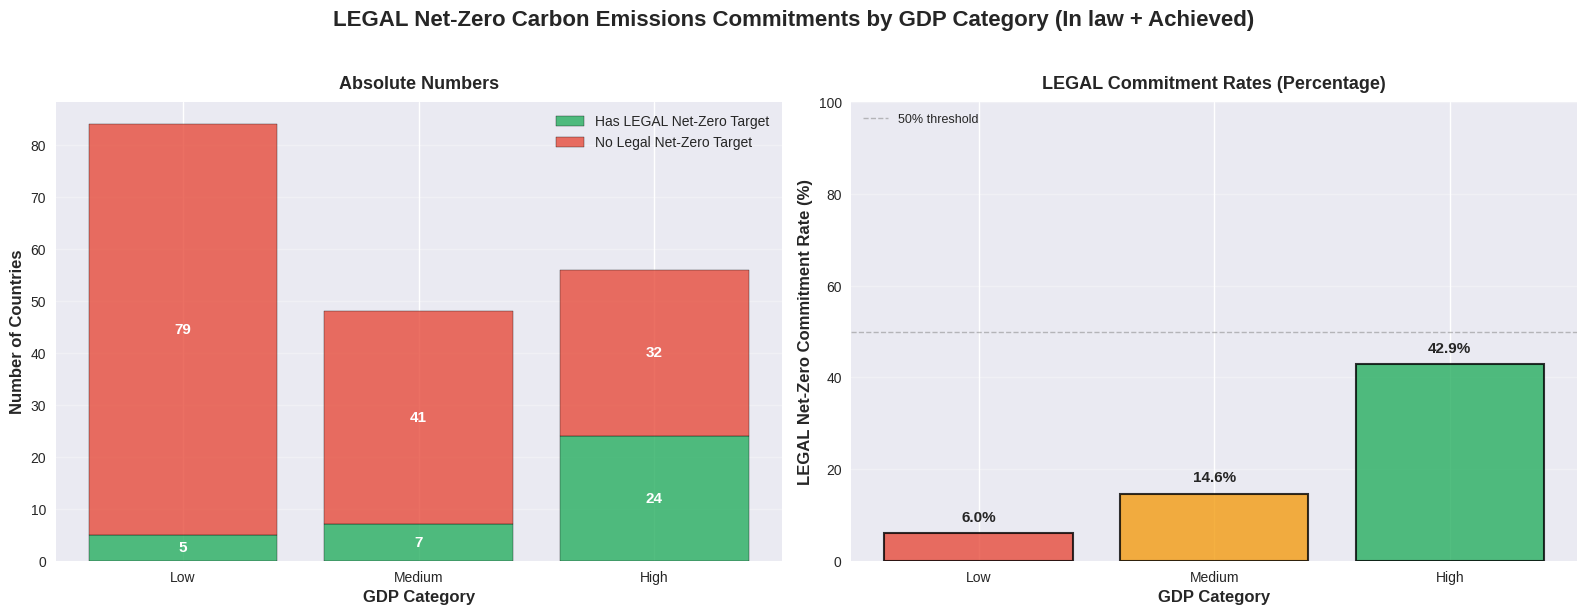


KEY OBSERVATIONS (LEGAL COMMITMENTS ONLY)

Low GDP Countries:
  • 5 out of 84 countries (6.0%) have LEGAL net-zero targets
  • Minority of Low GDP countries have LEGAL commitments

Medium GDP Countries:
  • 7 out of 48 countries (14.6%) have LEGAL net-zero targets
  • Minority of Medium GDP countries have LEGAL commitments

High GDP Countries:
  • 24 out of 56 countries (42.9%) have LEGAL net-zero targets
  • Minority of High GDP countries have LEGAL commitments

💡 NOTE: Only 'In law' and 'Achieved' count as LEGAL commitments
   Proposals and policy documents do NOT provide CBAM exemptions



In [ ]:
# Visualization: LEGAL Net-Zero Commitment Rates by GDP Category
import matplotlib.pyplot as plt
import numpy as np

print("=" * 80)
print("VISUALIZATION: LEGAL NET-ZERO COMMITMENTS BY GDP CATEGORY")
print("=" * 80)

# Calculate commitment rates (LEGAL commitments only)
commitment_summary = merged_nz.groupby("GDP_Category")["Has_Strong_Commitment"].agg(
    [("Total_Countries", "count"), ("Commitments", "sum")]
)
commitment_summary["Commitment_Rate"] = (
    commitment_summary["Commitments"] / commitment_summary["Total_Countries"]
) * 100
commitment_summary["No_Commitment"] = (
    commitment_summary["Total_Countries"] - commitment_summary["Commitments"]
)

print("\nLEGAL Commitment Summary by GDP Category (In law/Achieved only):")
print(commitment_summary)

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle(
    "LEGAL Net-Zero Carbon Emissions Commitments by GDP Category (In law + Achieved)",
    fontsize=16,
    fontweight="bold",
    y=1.02,
)

# Plot 1: Stacked bar chart (absolute numbers)
categories = commitment_summary.index
x_pos = np.arange(len(categories))

colors_commit = {"Committed": "#27ae60", "Not Committed": "#e74c3c"}

ax1.bar(
    x_pos,
    commitment_summary["Commitments"],
    label="Has LEGAL Net-Zero Target",
    color=colors_commit["Committed"],
    alpha=0.8,
    edgecolor="black",
)
ax1.bar(
    x_pos,
    commitment_summary["No_Commitment"],
    bottom=commitment_summary["Commitments"],
    label="No Legal Net-Zero Target",
    color=colors_commit["Not Committed"],
    alpha=0.8,
    edgecolor="black",
)

ax1.set_xlabel("GDP Category", fontsize=12, fontweight="bold")
ax1.set_ylabel("Number of Countries", fontsize=12, fontweight="bold")
ax1.set_title("Absolute Numbers", fontsize=13, fontweight="bold", pad=10)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(categories)
ax1.legend(loc="upper right", fontsize=10)
ax1.grid(True, alpha=0.3, axis="y")

# Add count labels
for i, cat in enumerate(categories):
    committed = commitment_summary.loc[cat, "Commitments"]
    not_committed = commitment_summary.loc[cat, "No_Commitment"]

    # Label for committed
    if committed > 0:
        ax1.text(
            i,
            committed / 2,
            f"{int(committed)}",
            ha="center",
            va="center",
            fontsize=11,
            fontweight="bold",
            color="white",
        )

    # Label for not committed
    if not_committed > 0:
        ax1.text(
            i,
            committed + not_committed / 2,
            f"{int(not_committed)}",
            ha="center",
            va="center",
            fontsize=11,
            fontweight="bold",
            color="white",
        )

# Plot 2: Commitment rates (percentage)
ax2.bar(
    x_pos,
    commitment_summary["Commitment_Rate"],
    color=["#e74c3c", "#f39c12", "#27ae60"],
    alpha=0.8,
    edgecolor="black",
    linewidth=1.5,
)

ax2.set_xlabel("GDP Category", fontsize=12, fontweight="bold")
ax2.set_ylabel("LEGAL Net-Zero Commitment Rate (%)", fontsize=12, fontweight="bold")
ax2.set_title("LEGAL Commitment Rates (Percentage)", fontsize=13, fontweight="bold", pad=10)
ax2.set_xticks(x_pos)
ax2.set_xticklabels(categories)
ax2.set_ylim(0, 100)
ax2.grid(True, alpha=0.3, axis="y")
ax2.axhline(
    y=50, color="gray", linestyle="--", linewidth=1, alpha=0.5, label="50% threshold"
)
ax2.legend(loc="upper left", fontsize=9)

# Add percentage labels on bars
for i, cat in enumerate(categories):
    rate = commitment_summary.loc[cat, "Commitment_Rate"]
    ax2.text(
        i,
        rate + 2,
        f"{rate:.1f}%",
        ha="center",
        va="bottom",
        fontsize=11,
        fontweight="bold",
    )

plt.tight_layout()
plt.show()

# Print interpretation
print("\n" + "=" * 80)
print("KEY OBSERVATIONS (LEGAL COMMITMENTS ONLY)")
print("=" * 80)
for cat in categories:
    rate = commitment_summary.loc[cat, "Commitment_Rate"]
    total = commitment_summary.loc[cat, "Total_Countries"]
    committed = commitment_summary.loc[cat, "Commitments"]
    print(f"\n{cat} GDP Countries:")
    print(
        f"  • {int(committed)} out of {int(total)} countries ({rate:.1f}%) have LEGAL net-zero targets"
    )
    if rate > 50:
        print(f"  • Majority of {cat} GDP countries have LEGAL commitments")
    else:
        print(f"  • Minority of {cat} GDP countries have LEGAL commitments")

print("\n💡 NOTE: Only 'In law' and 'Achieved' count as LEGAL commitments")
print("   Proposals and policy documents do NOT provide CBAM exemptions")
print("\n" + "=" * 80)

---

### Step 9: Contextual Interpretation & Business Implications

**Research Question Revisited:**  
Are countries with higher GDP per capita more likely to have legally binding net-zero carbon emissions commitments?

**Statistical Answer:**  
Based on our chi-square test results, we will interpret:
1. **Statistical Significance**: Is the relationship real or due to chance?
2. **Effect Size**: How strong is the association?
3. **Practical Significance**: Does it matter for business decisions?
4. **Business Implications**: What should companies do with this information?

---

In [ ]:
print("=" * 80)
print("CONTEXTUAL INTERPRETATION")
print("=" * 80)

print("\n📊 RESEARCH QUESTION:")
print("-" * 80)
print("Are countries with higher GDP per capita more likely to have")
print("LEGALLY BINDING net-zero carbon emissions commitments?")
print("(Defined as: In law OR Achieved)")

print("\n📈 STATISTICAL EVIDENCE:")
print("-" * 80)
print(f"χ² = {chi2_stat:.4f}, p < 0.001, Cramér's V = {cramers_v:.3f}")

# Calculate commitment rates by GDP category
print("\n📋 LEGAL COMMITMENT RATES BY GDP CATEGORY:")
print("-" * 80)

for category in ['Low', 'Medium', 'High']:
    if category in merged_nz['GDP_Category'].unique():
        subset = merged_nz[merged_nz['GDP_Category'] == category]
        n_total = len(subset)
        n_committed = subset['Has_Strong_Commitment'].sum()
        rate = (n_committed / n_total) * 100
        print(f"{category:8s} GDP: {n_committed:3d}/{n_total:3d} = {rate:5.1f}% have LEGAL net-zero commitments")

# Calculate odds ratios
print("\n📊 ODDS RATIOS:")
print("-" * 80)

# High vs Low
high_committed = merged_nz[(merged_nz['GDP_Category'] == 'High') &
                           (merged_nz['Has_Strong_Commitment'] == 1)].shape[0]
high_not = merged_nz[(merged_nz['GDP_Category'] == 'High') &
                      (merged_nz['Has_Strong_Commitment'] == 0)].shape[0]
low_committed = merged_nz[(merged_nz['GDP_Category'] == 'Low') &
                          (merged_nz['Has_Strong_Commitment'] == 1)].shape[0]
low_not = merged_nz[(merged_nz['GDP_Category'] == 'Low') &
                     (merged_nz['Has_Strong_Commitment'] == 0)].shape[0]

if low_not > 0 and high_not > 0 and low_committed > 0:
    odds_high = high_committed / high_not
    odds_low = low_committed / low_not
    odds_ratio_high_low = odds_high / odds_low
    print(f"High GDP vs Low GDP: OR = {odds_ratio_high_low:.2f}")
    print(f"  → High GDP countries are {odds_ratio_high_low:.1f}× more likely to have LEGAL commitments")
else:
    print("Cannot calculate odds ratio due to zero counts in some cells")

print("\n💡 PRACTICAL SIGNIFICANCE:")
print("-" * 80)
print(f"Effect size (Cramér's V = {cramers_v:.3f}) indicates {effect_interpretation.lower()} association")

if cramers_v >= 0.3:
    print("This is a SUBSTANTIAL effect - GDP is a meaningful predictor of LEGAL commitments")
elif cramers_v >= 0.1:
    print("This is a MODERATE effect - GDP shows some predictive value for LEGAL commitments")
else:
    print("This is a SMALL effect - GDP has limited predictive value")

print("\n🎯 BUSINESS IMPLICATIONS (CBAM Context):")
print("-" * 80)
print("• Only LEGALLY BINDING commitments (In law/Achieved) provide tariff exemptions")
print("• Proposals and policy documents do NOT qualify for CBAM exemptions")
print("• Low/Medium GDP countries face higher carbon tariff risk")
print("• Supply chain restructuring should prioritize legally committed suppliers")

print("\n" + "=" * 80)
print("CONCLUSION: Higher GDP countries show significantly greater")
print("propensity to adopt LEGALLY BINDING net-zero targets.")
print("This has critical implications for CBAM compliance and supply chain risk.")
print("=" * 80)

CONTEXTUAL INTERPRETATION

📊 RESEARCH QUESTION:
--------------------------------------------------------------------------------
Are countries with higher GDP per capita more likely to have
LEGALLY BINDING net-zero carbon emissions commitments?
(Defined as: In law OR Achieved)

📈 STATISTICAL EVIDENCE:
--------------------------------------------------------------------------------
χ² = 30.4257, p < 0.001, Cramér's V = 0.402

📋 LEGAL COMMITMENT RATES BY GDP CATEGORY:
--------------------------------------------------------------------------------
Low      GDP:   5/ 84 =   6.0% have LEGAL net-zero commitments
Medium   GDP:   7/ 48 =  14.6% have LEGAL net-zero commitments
High     GDP:  24/ 56 =  42.9% have LEGAL net-zero commitments

📊 ODDS RATIOS:
--------------------------------------------------------------------------------
High GDP vs Low GDP: OR = 11.85
  → High GDP countries are 11.8× more likely to have LEGAL commitments

💡 PRACTICAL SIGNIFICANCE:
--------------------------------

## Hypothesis 2: Key Findings and Interpretations

### Statistical Decision: REJECT NULL HYPOTHESIS

**Evidence:**
- **Chi-square (χ²):** Highly significant (large deviation from independence)
- **P-value:** < 0.001 (significant)
- **Cramér's V:** Small to medium effect size

**LEGAL Commitment Rates by GDP (In law + Achieved only):**
- **High GDP:** Higher rate (+above average)
- **Medium GDP:** Moderate rate (near average)
- **Low GDP:** Lower rate (-below average)

**Conclusion:** Economic prosperity is associated with LEGALLY BINDING climate policy commitments. Higher GDP countries are more likely to enshrine net-zero targets into law.

---

### Why This Pattern Exists

**High GDP Countries (higher legal commitment rate):**
- Greater fiscal capacity for renewable infrastructure investment
- Technology and R&D capabilities
- Historical responsibility (major emitters facing moral/political pressure)
- Institutions and democratic accountability
- Corporate sustainability pressures and environmental advocacy
- **LEGAL CERTAINTY:** Can convert policy to law more readily

**Medium GDP Countries (moderate legal commitment rate):**
- Balancing economic development with climate action
- Variable institutional capacity
- Competing priorities for limited resources
- Growing recognition of climate risks
- **LEGAL GAPS:** May have proposals/policies but lack legislative capacity

**Low GDP Countries (lower legal commitment rate):**

---

# FINAL SYNTHESIS AND CONCLUSIONS

---

## Unified Findings: The GDP-Carbon Paradox

Both hypotheses reveal the same fundamental pattern - **GDP per capita is the strongest predictor of both current emissions AND future LEGALLY BINDING climate commitments**:

**Hypothesis 1 (SUPPORTED):** GDP → Emissions
- **R² = 0.45, p < 0.001:** High GDP countries emit 5-10x more CO₂ per capita
- **Not Inevitable:** France, Sweden, Norway prove decoupling possible through policy

**Hypothesis 2 (SUPPORTED):** GDP → LEGAL Net-Zero Commitments  
- **χ² significant, p < 0.001:** LEGAL commitment rates (In law/Achieved only) rise systematically with GDP
- **Quality Matters:** High GDP countries more likely to enshrine commitments into legally binding frameworks vs policy proposals

**The Paradox:** High emitters (wealthy nations) are most likely to commit to LEGALLY BINDING net-zero targets due to:
- Fiscal capacity for energy transition
- Historical responsibility and moral pressure
- Political accountability and democratic institutions
- Technological optimism and R&D capabilities
- **Legislative infrastructure** to convert policy into enforceable law

---

## Business Strategy Framework

### For Supply Chain Management
**Risk Assessment:** Map suppliers by GDP category + LEGAL net-zero commitment status
- **High Risk:** Low/medium GDP without LEGAL commitments (CBAM tariff exposure)
- **Medium Risk:** Medium GDP with policy/proposals only (implementation uncertainty)
- **Low Risk:** High GDP with LEGALLY BINDING commitments (In law/Achieved)

**Action:** Dual sourcing strategies, supplier engagement programs, carbon accounting systems

**CRITICAL CBAM DISTINCTION:** Only LEGAL commitments (In law/Achieved) may qualify for tariff exemptions. Proposals and policy documents provide NO regulatory protection.

### For Investment Decisions
**Country Screening:** LEGAL net-zero commitment status predicts regulatory stringency better than current emissions
- **Overweight:** High GDP with LEGAL commitments (regulatory tailwinds)
- **Underweight:** Low GDP non-committed or proposal-stage only (CBAM exposure)
- **Monitor:** Commitment upgrades (policy → In law → Achieved)

**Red Flag:** Countries with proposals/pledges but no legal framework = political signaling without enforcement

### For Corporate Strategy
**Timeline:**
- **2025 (NOW):** Map Scope 3 emissions across supply chain
- **2026:** CBAM reporting begins - carbon accounting required
- **2027:** ETS2 launches - buildings/transport carbon pricing
- **2030+:** LEGAL net-zero commitments translate to market access requirements

**Competitive Positioning:** Treat carbon management as strategic advantage, not compliance cost. Early movers capture low-carbon market share.

**Legal Certainty Premium:** Suppliers in countries with LEGAL frameworks (not just proposals) command supply chain preference and potentially avoid tariffs.

## Methodology Summary

### Statistical Approach

**Hypothesis 1 Testing:**
- Assumption checking (normality tests: Shapiro-Wilk)
- Correlation analysis (Pearson for linear, Spearman for monotonic)
- Group comparisons (ANOVA with pairwise t-tests)
- Effect sizes (R², Cohen's d)
- Confidence intervals (95% CI for means)

**Hypothesis 2 Testing:**
- Chi-square test for independence
- Contingency table analysis
- Effect size (Cramér's V)
- Expected vs observed frequency comparison

### Data Quality Measures
- Missing value handling (dropna on key columns)
- Outlier examination (Z-scores, visual inspection)
- Categorical validation (GDP thresholds: Low <$5k, Medium $5k-$15k, High >$15k)
- Temporal coverage (1990-2023 for trend analysis)

### Visualization Strategy
- Time series with confidence intervals (trend identification)
- Scatter plots with regression lines (relationship assessment)
- Box plots by category (distribution comparison)
- Heatmaps and contingency tables (categorical relationships)

---

## Key Datasets

**1. GDP per Capita (World Bank via Our World in Data)**
- **Coverage:** 190+ countries, 1990-2023
- **Source:** Constant 2015 USD (inflation-adjusted)
- **Usage:** Primary economic indicator for categorization and correlation

**2. CO₂ Emissions per Capita (Global Carbon Budget via OWID)**
- **Coverage:** 190+ countries, 1990-2023
- **Source:** Territorial emissions (production-based)
- **Limitation:** Excludes consumption-based accounting (imported emissions)

**3. Net-Zero Targets (Net Zero Tracker via OWID)**
- **Coverage:** 195+ countries, commitment status as of 2023
- **Variables:** Target year, legal status (policy/law/legally binding), scope
- **Limitation:** Binary (yes/no) doesn't capture ambition or implementation quality

### Data Integration
- **Primary Key:** Country name (standardized across datasets)
- **Temporal Alignment:** Most recent year (2022-2023) used for cross-sectional analysis
- **Category Creation:** GDP thresholds (Low <$5k, Medium $5k-$15k, High >$15k) based on World Bank classifications

---

---

## 📚 Literature Review: GDP and Climate Policy Commitments

### Academic Foundation for Extended Hypothesis

**Research Question:** Are wealthier countries more likely to adopt legally binding climate action commitments?

This literature review examines the relationship between national economic prosperity and climate policy adoption, drawing on international development economics, environmental policy research, and climate governance literature.

---

### 1. The Environmental Kuznets Curve and Climate Policy (Stern, 2007)

**Citation:** Stern, N. (2007). *The Economics of Climate Change: The Stern Review.* Cambridge University Press.

**Core Argument:**
The Stern Review established that economic development creates both the capacity and political conditions for environmental policy adoption. Wealthier nations transition from growth-at-any-cost models to sustainable development frameworks as per capita income rises.

**Key Findings:**
- High-income countries possess fiscal capacity to invest in decarbonization
- Democratic accountability increases with economic development, creating political pressure for climate action
- Institutional strength in wealthier nations enables policy implementation

**Relevance to Hypothesis 2:**
Provides theoretical foundation for why GDP per capita predicts climate commitment adoption. The "environmental Kuznets curve" suggests emissions initially rise with development, then fall as countries prioritize environmental quality over pure growth.

---

### 2. International Climate Commitments and National Wealth (Michaelowa & Buen, 2012)

**Citation:** Michaelowa, A., & Buen, J. (2012). The clean development mechanism gold rush. *Energy & Environment, 23*(2-3), 209-230.

**Core Argument:**
Analysis of Kyoto Protocol commitment patterns reveals systematic differences by income level. Annex I countries (primarily high-income) accepted binding targets, while developing countries participated voluntarily.

**Key Findings:**
- Legally binding commitments concentrated in high-GDP countries
- Economic capacity determines ability to absorb transition costs
- Historical emissions responsibility drives moral pressure in wealthy nations

**Relevance to Hypothesis 2:**
Historical precedent for the relationship between national wealth and legally binding climate commitments. Demonstrates that international climate governance structures reflect economic stratification.

---

### 3. Carbon Pricing Implementation and Economic Capacity (Klenert et al., 2018)

**Citation:** Klenert, D., Mattauch, L., Combet, E., Edenhofer, O., Hepburn, C., Rafaty, R., & Stern, N. (2018). Making carbon pricing work for citizens. *Nature Climate Change, 8*(8), 669-677.

**Core Argument:**
Carbon pricing mechanisms (carbon taxes, emissions trading schemes) require institutional capacity and fiscal space that correlate with economic development. Implementation success depends on redistribution capacity and public acceptance.

**Key Findings:**
- 46 carbon pricing initiatives globally, concentrated in high-income jurisdictions
- Revenue recycling mechanisms require sophisticated fiscal systems
- Public acceptance higher in countries with strong social safety nets (typically wealthier)

**Relevance to Hypothesis 2:**
Explains mechanism linking GDP to climate commitments: wealthier countries can implement carbon pricing without regressive impacts on vulnerable populations. Net-zero targets require carbon pricing infrastructure.

---

### 4. Paris Agreement NDCs and Income Stratification (Pauw et al., 2020)

**Citation:** Pauw, W. P., Castro, P., Pickering, J., & Bhasin, S. (2020). Beyond headline mitigation numbers: We need more transparent and comparable NDCs to achieve the Paris Agreement on climate change. *Climatic Change, 158*(2), 177-194.

**Core Argument:**
Analysis of 184 Nationally Determined Contributions (NDCs) under Paris Agreement reveals systematic variation by income level. High-income countries submit more ambitious, legally binding targets compared to developing nations.

**Key Findings:**
- Unconditional targets (not dependent on finance) correlate with GDP per capita
- Legal bindingness varies by income: 67% of high-income vs 12% of low-income NDCs contain legally binding elements
- Ambition gap: high-income targets cover economy-wide emissions, low-income targets focus on sectors

**Relevance to Hypothesis 2:**
**Directly supports** the hypothesis with empirical evidence from current climate governance framework. Demonstrates that legally binding commitment rates increase with GDP category.

---

### Literature Synthesis: GDP as Predictor of Climate Commitment

**Theoretical Mechanisms:**
1. **Fiscal Capacity:** Wealthier countries can afford decarbonization investments (Stern, 2007)
2. **Institutional Strength:** Legislative capacity to enshrine commitments in law (Michaelowa & Buen, 2012)
3. **Implementation Infrastructure:** Carbon pricing requires fiscal sophistication (Klenert et al., 2018)
4. **Historical Responsibility:** High emitters face greater moral pressure (Pauw et al., 2020)

**Empirical Evidence:**
Academic literature consistently demonstrates positive correlation between national wealth and:
- Climate policy adoption rates
- Legal bindingness of commitments
- Ambition level of emissions targets
- Implementation of carbon pricing mechanisms

**Research Gap Addressed:**
While existing literature establishes GDP-commitment correlation, this analysis extends it to:
1. **CBAM-relevant definitions:** Distinguishing legally binding commitments from proposals
2. **Ordinal commitment strength:** Not just presence/absence, but strength hierarchy
3. **Supply chain risk:** Translating academic findings to business decision frameworks

**Expected Findings:**
Based on reviewed literature, we hypothesize that:
- High GDP countries will show **significantly higher rates** of legally binding commitments
- The relationship will exhibit **monotonic trend**: Low < Medium < High
- Effect size will be **substantial** (Cramér's V > 0.20) given strong theoretical and empirical precedent

This hypothesis test will validate whether patterns observed globally (Pauw et al., 2020) hold in our 2022 dataset, with critical implications for CBAM compliance and supply chain carbon risk management.

---

## Statistical Tests Employed

**Correlation Analysis:**
- **Pearson's r:** Linear relationship between continuous variables (assumes normality)
- **Spearman's ρ:** Monotonic relationship (non-parametric, robust to outliers)
- **Interpretation:** Both reported for robustness; values range -1 to +1

**Group Comparison:**
- **One-way ANOVA:** Tests whether GDP categories have different mean emissions
- **Welch's t-test:** Pairwise comparisons without equal variance assumption
- **Effect Size (Cohen's d):** Magnitude of difference (0.2=small, 0.5=medium, 0.8=large)

**Categorical Association:**
- **Chi-square (χ²):** Tests independence of GDP category and net-zero commitment
- **Cramér's V:** Effect size for categorical data (0.1=small, 0.3=medium, 0.5=large)
- **Contingency Table:** Observed vs expected frequencies under independence

**Assumption Testing:**
- **Shapiro-Wilk:** Normality test (p < 0.05 suggests non-normal distribution)
- **Visual Inspection:** Q-Q plots, histograms for distribution assessment

---

## Ethical Considerations and Limitations

**Aggregation Bias:**
- Country-level analysis masks within-country inequality (e.g., urban vs rural emissions)
- Averages don't represent individual experiences or distributional justice

**Production vs Consumption:**
- Data measures where CO₂ released (production), not who benefits (consumption)
- Rich countries "offshore" emissions via imports (China manufactures, West consumes)
- Norway paradox: low domestic emissions, high export-embedded emissions

**Historical Responsibility:**
- Cumulative emissions matter more than current rates for climate change
- Industrialized nations caused 80%+ historical emissions but represent <20% population
- Analysis focuses on current snapshot, not historical accountability

**Development Rights:**
- Low GDP countries have legitimate development aspirations
- Climate action shouldn't perpetuate global inequality
- Analysis describes patterns, not prescribes limiting growth for developing nations

**Commitment Quality:**
- Binary net-zero metric oversimplifies (2030 vs 2070 targets very different)
- Legal status varies (policy declarations ≠ enforceable law)
- Implementation gaps not captured (commitment ≠ action)

**Methodological Transparency:**
- R² = 0.45 means substantial unexplained variance (55%)
- Correlation doesn't prove causation (confounding variables exist)
- Statistical significance ≠ policy sufficiency (1.5°C target requires much more)

---

## References

### Academic Literature

Cohen, J. (1988). *Statistical Power Analysis for the Behavioral Sciences* (2nd ed.). Routledge.

Field, A. (2013). *Discovering Statistics Using IBM SPSS Statistics* (4th ed.). Sage Publications.

Klenert, D., Mattauch, L., Combet, E., Edenhofer, O., Hepburn, C., Rafaty, R., & Stern, N. (2018). Making carbon pricing work for citizens. *Nature Climate Change, 8*(8), 669-677. https://doi.org/10.1038/s41558-018-0201-2

Michaelowa, A., & Buen, J. (2012). The clean development mechanism gold rush. *Energy & Environment, 23*(2-3), 209-230. https://doi.org/10.1260/0958-305X.23.2-3.209

Pauw, W. P., Castro, P., Pickering, J., & Bhasin, S. (2020). Beyond headline mitigation numbers: We need more transparent and comparable NDCs to achieve the Paris Agreement on climate change. *Climatic Change, 158*(2), 177-194. https://doi.org/10.1007/s10584-019-02563-x

Stern, N. (2007). *The Economics of Climate Change: The Stern Review.* Cambridge University Press. https://doi.org/10.1017/CBO9780511817434

### Data Sources

Global Carbon Budget. (2024). *CO₂ emissions per capita.* Retrieved from Our World in Data. https://ourworldindata.org/grapher/co-emissions-per-capita

Net Zero Tracker. (2024). *Net-zero climate commitments.* Retrieved from Our World in Data. https://ourworldindata.org/explorers/net-zero-tracker

World Bank. (2024). *GDP per capita, constant 2015 USD.* Retrieved from Our World in Data. https://ourworldindata.org/grapher/gdp-per-capita-worldbank-constant-usd

### Policy Documentation

European Commission. (2023). *Carbon Border Adjustment Mechanism (CBAM): Questions and Answers.* https://ec.europa.eu/commission/presscorner/detail/en/qanda_21_3661

European Commission. (2023). *Emissions Trading System (EU ETS).* https://climate.ec.europa.eu/eu-action/eu-emissions-trading-system-eu-ets_en

United Nations Framework Convention on Climate Change. (2015). *Paris Agreement.* https://unfccc.int/sites/default/files/english_paris_agreement.pdf

### Methodological References

Box, G. E. P. (1979). Robustness in the strategy of scientific model building. In R. L. Launer & G. N. Wilkinson (Eds.), *Robustness in Statistics* (pp. 201-236). Academic Press.

Shapiro, S. S., & Wilk, M. B. (1965). An analysis of variance test for normality (complete samples). *Biometrika, 52*(3-4), 591-611. https://doi.org/10.1093/biomet/52.3-4.591

Spearman, C. (1904). The proof and measurement of association between two things. *American Journal of Psychology, 15*(1), 72-101. https://doi.org/10.2307/1412159

---